In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from operator import itemgetter

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
def barplot_nodes(graph,centrality, centrality_name):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    fig.suptitle(centrality_name + ' Centrality barplot and nodes highlights')

    #barplot
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    plt.figure(figsize=(15,10))
    sns.barplot(x=x, y=y, ax=ax1)


    #ottenimento dei colori
    col = []
    x_values = ax1.get_xticklabels()
    x_values = [x.get_text() for x in x_values]
    for i in range(0, len(ax1.patches)):
        colori = []
        colori = list(ax1.patches[i].get_facecolor())
        colori.append(int(x_values[i]))
        col.append(colori)
    
    dizionario_colori = {}
    for colori in col:
        color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
        dizionario_colori.update({colori[4]: color_HEX})
    print(dizionario_colori)



    #aggiunta nodi colorati in base al barplot
    plt.figure(figsize=(12,8))
    pos_sample = nx.spring_layout(graph)
    nx.draw(graph, pos_sample, ax=ax2, with_labels = False)
    nx.draw_networkx_nodes(graph, pos_sample, ax=ax2, nodelist=list(dizionario_colori.keys()), node_color=list(dizionario_colori.values()))
    plt.show()

    return dizionario_colori

In [4]:
def important_node_centrality_plot(centrality, df_edge, dizionario_colori):
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    
    nodes = labels
    edges = []

    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))

    graph_deg = nx.Graph()
    graph_deg.add_edges_from(edges)
    graph_deg.add_nodes_from(nodes)
    pos_deg = nx.spring_layout(graph_deg)

    plt.figure(figsize=(12,8))
    nx.draw(graph_deg, pos_deg, node_size=1000, nodelist=list(dizionario_colori.keys()), with_labels = False, node_color=list(dizionario_colori.values())) 
    nx.draw_networkx_labels(graph_deg, pos_deg, labels)
    plt.show()

In [5]:
df_edge = pd.read_csv('twitch\RU\musae_RU_edges.csv')
df_target = pd.read_csv('twitch\RU\musae_RU_target.csv')

In [6]:
#Ordino gli streamer per numero di visualizzazioni
df_target = df_target.sort_values(by=['views'], ascending=False).reset_index()
df_target = df_target.drop(['index'], axis=1)

In [7]:

nodes = df_target['new_id']
edges = list(zip(df_edge["from"],df_edge["to"]))

In [8]:
graph = nx.Graph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
graph = graph.subgraph(n for n, d in graph.degree() if d >= 100)

### Analisi descrittiva

In [84]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
print("IS_CONNECTED: ", nx.is_connected(graph))
print("RAGGIO: ", nx.radius(graph))
print("DIAMETRO: ", nx.diameter(graph))


NODES:  89
EDGES:  877
DENSITY:  0.224
CLUSTERING:  0.4609461645196426
IS_CONNECTED:  True
RAGGIO:  2
DIAMETRO:  3


In [85]:
nx.clustering(graph)

{3: 0.6,
 6: 0.6666666666666666,
 1550: 0.2661290322580645,
 528: 0.1,
 2580: 0.5120967741935484,
 4121: 0.5299145299145299,
 3104: 0.3,
 3119: 0.5333333333333333,
 3633: 0.23809523809523808,
 1585: 0.28879892037786775,
 2614: 0.4935064935064935,
 568: 0.45454545454545453,
 57: 0.6071428571428571,
 2634: 0.3619047619047619,
 598: 0.4117647058823529,
 97: 0.6268115942028986,
 108: 0.6594202898550725,
 3183: 0.45054945054945056,
 3184: 0.367843137254902,
 636: 0,
 3205: 0.5,
 646: 0.47863247863247865,
 2698: 0.6210826210826211,
 1180: 0.4835164835164835,
 3743: 0.3058510638297872,
 3237: 1.0,
 3243: 0.4,
 4277: 0.43865546218487395,
 693: 0.42857142857142855,
 1725: 0.4065934065934066,
 1214: 0.41818181818181815,
 4285: 0.23351158645276293,
 2243: 0.36257309941520466,
 203: 0.4722222222222222,
 715: 0.3076923076923077,
 208: 0.4131054131054131,
 1749: 0.6909090909090909,
 2777: 0.43853820598006643,
 4313: 0.3333333333333333,
 3294: 0.2578947368421053,
 2273: 0.6884057971014492,
 2276: 0.4

Longest shortest path

In [86]:
# LSP = nx.dag_longest_path_length(graph)
# print('LSP = ' + str(LSP))

# LSP = nx.dag_longest_path(graph)
# #disegniamo il grafo
# plt.figure(figsize=(15,15))
# pos = nx.spring_layout(graph)
# nx.draw(graph, pos, with_labels=True)
# print('Nodi del LSP:')
# print(LSP)
# #disegniamo solo gli archi del LSP
# edges_2 = [(LSP[i], LSP[i+1]) for i in range(len(LSP)-1)]
# nx.draw_networkx_edges(graph, pos, edgelist=edges_2, edge_color='r', width=2)
# plt.show()

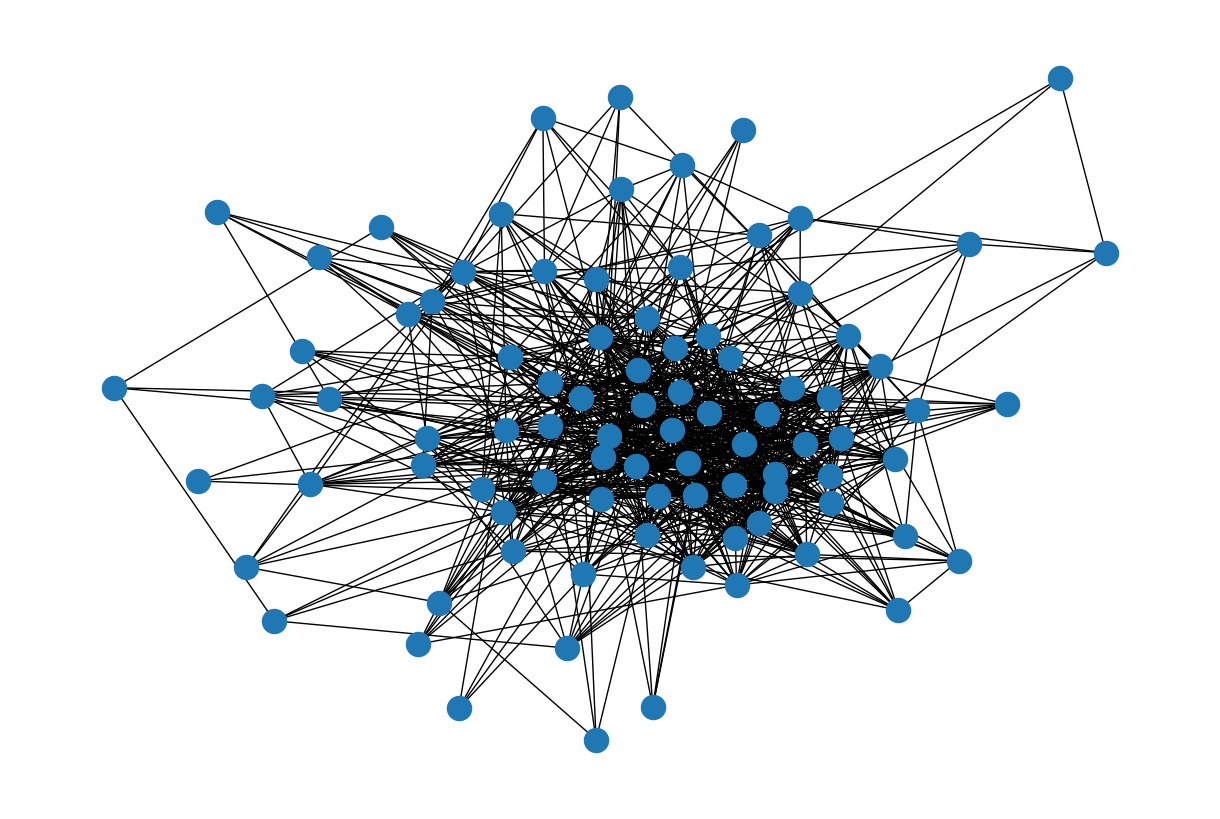

In [87]:
pos = nx.fruchterman_reingold_layout(graph)
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

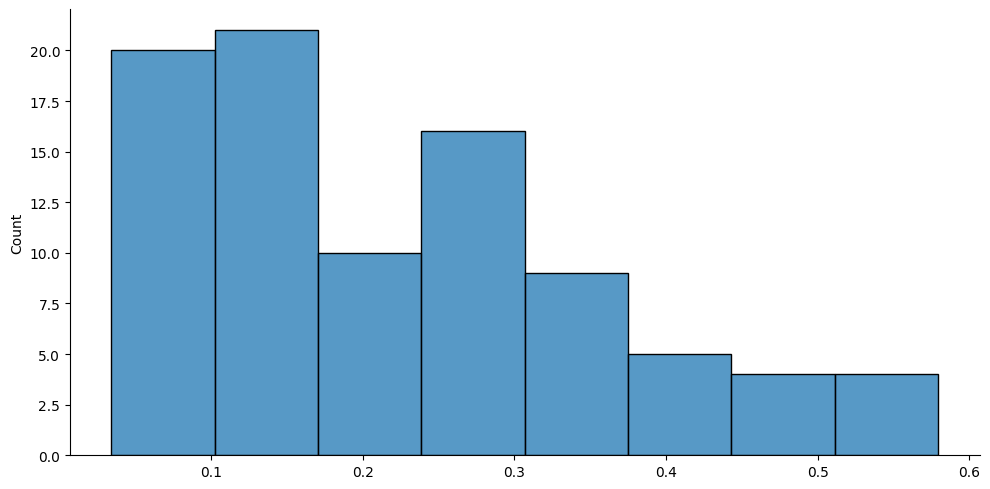

In [88]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

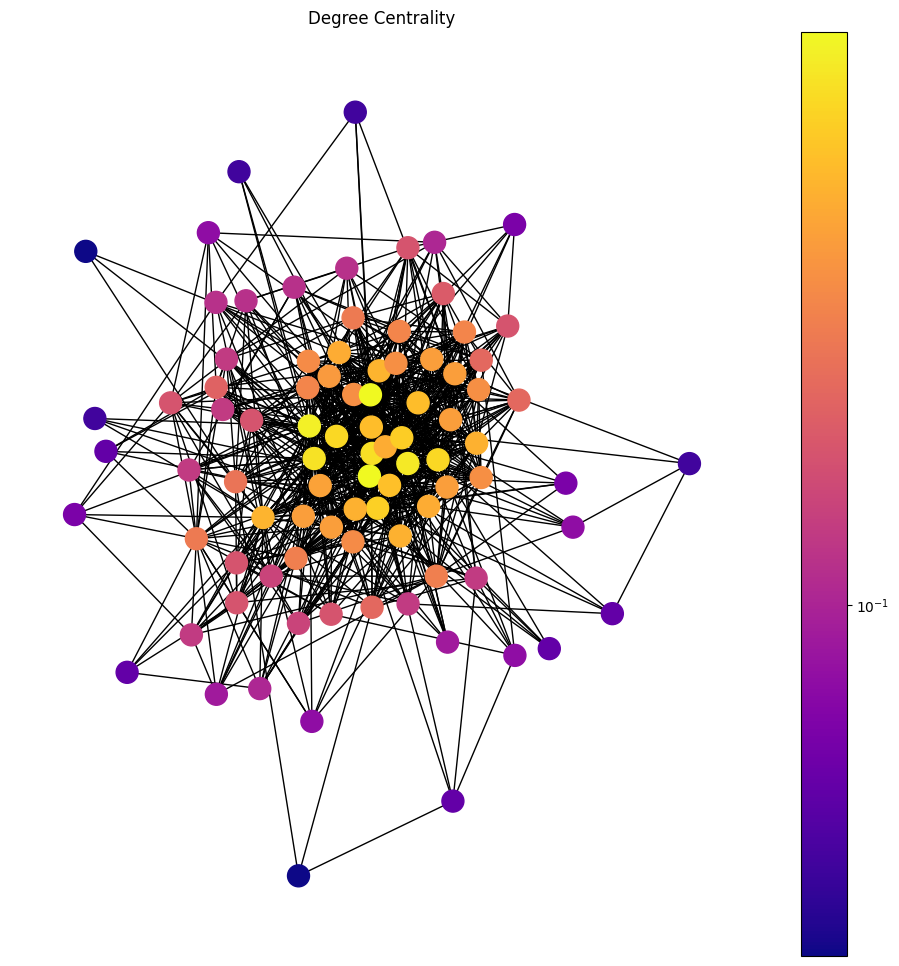

In [89]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

In [90]:
'''
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti
'''

"\nplt.figure(figsize=(12,12))\npos = nx.spiral_layout(graph)\ndraw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti\n"

{886: '#3173a1', 907: '#e0802c', 1585: '#3a913a', 1800: '#c03c3d', 2425: '#9371b2', 2535: '#835b53', 2777: '#d584bc', 3184: '#7f7f7f', 3579: '#a8a935', 3743: '#2dabb8'}


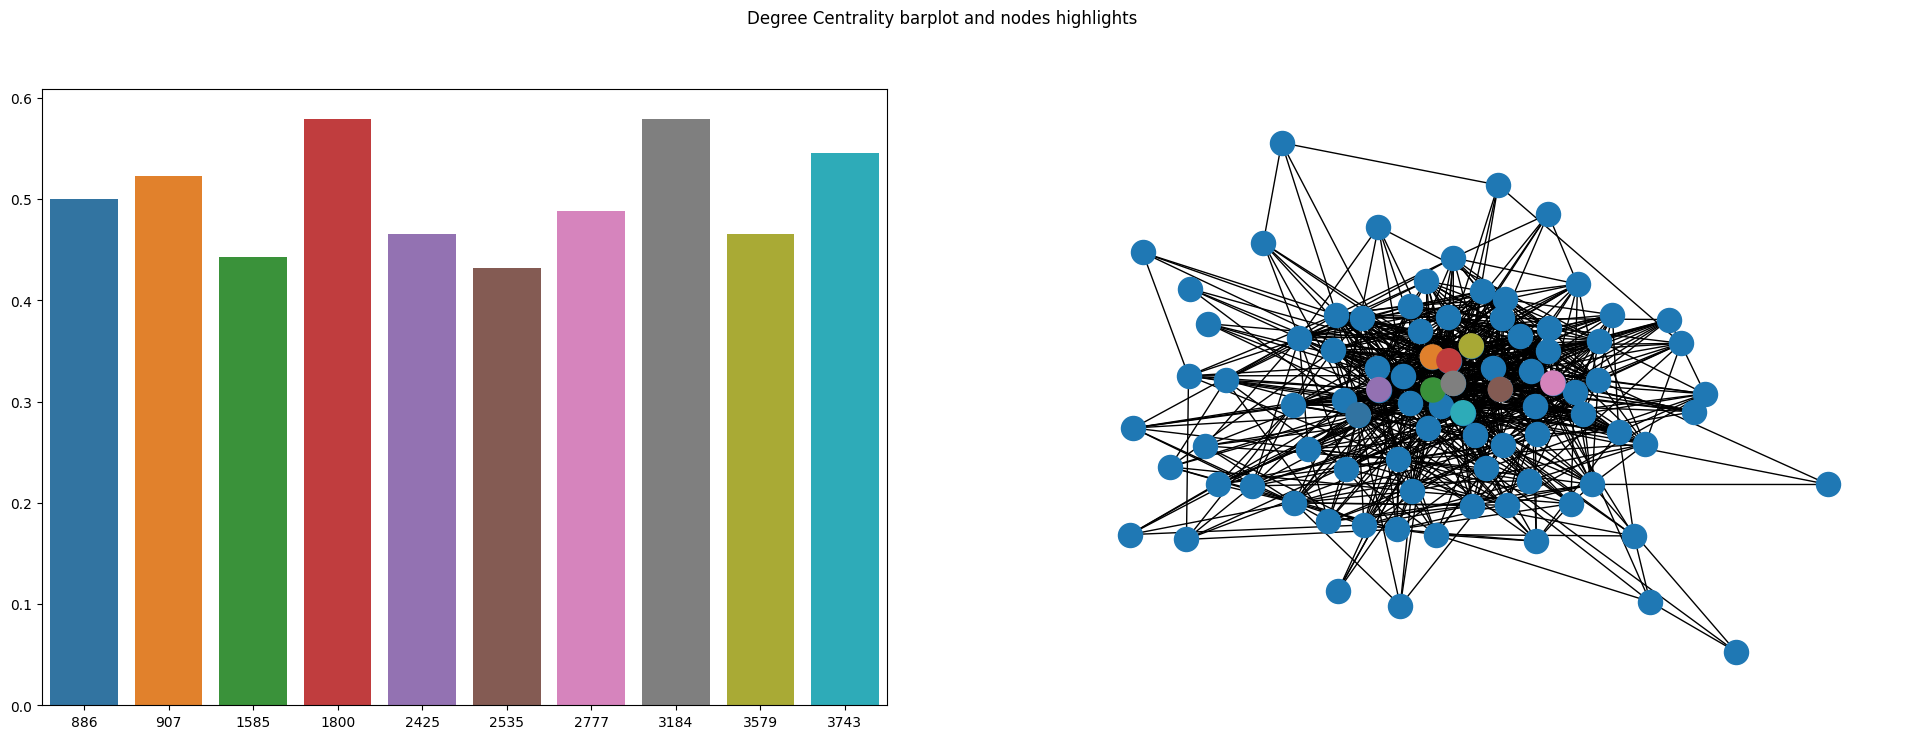

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [91]:
dizionario_colori = barplot_nodes(graph,degree, "Degree")

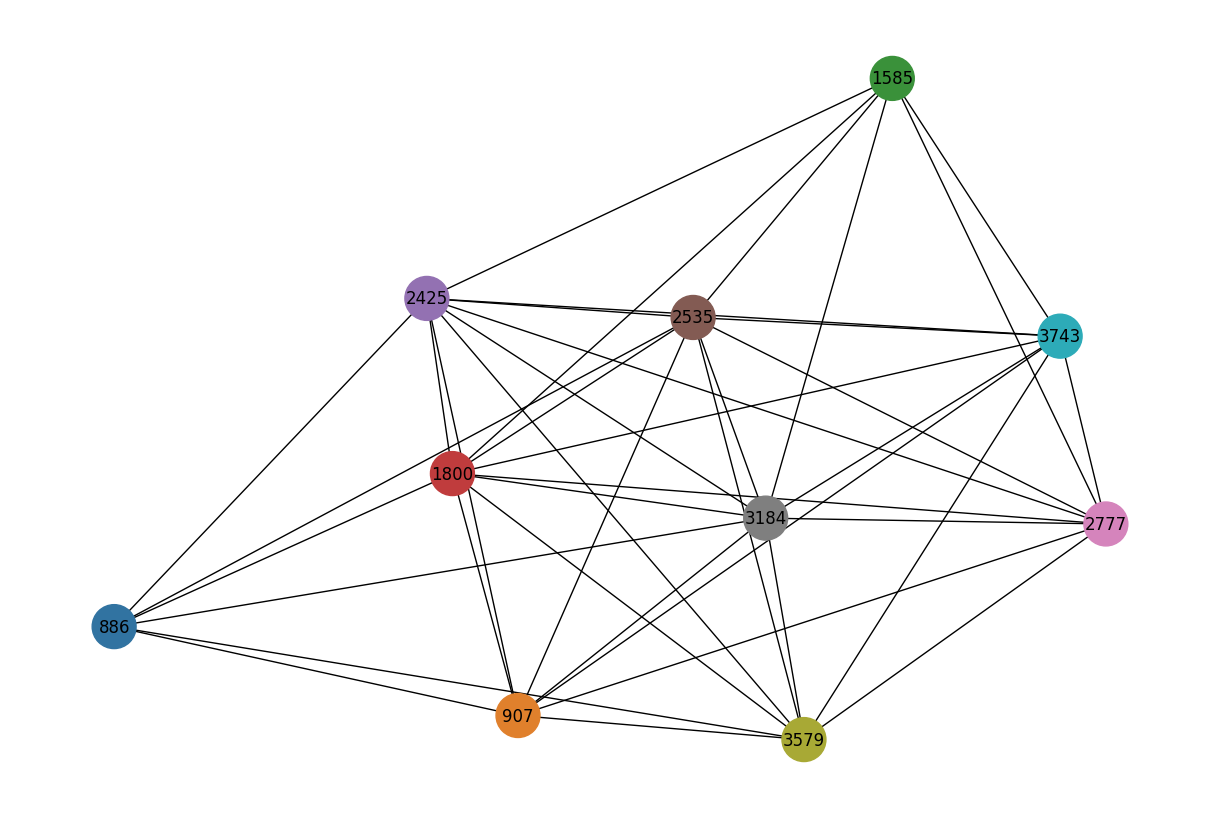

In [92]:
important_node_centrality_plot(degree, df_edge, dizionario_colori)

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

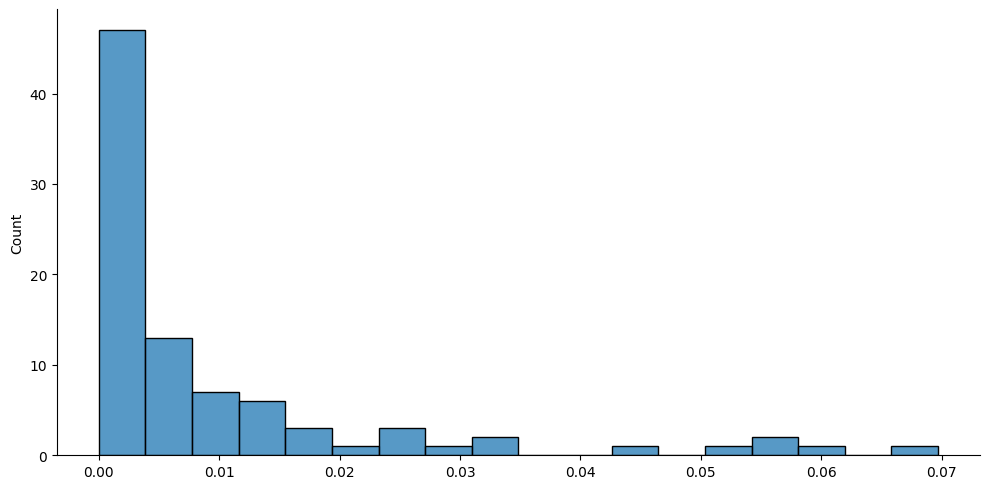

In [93]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

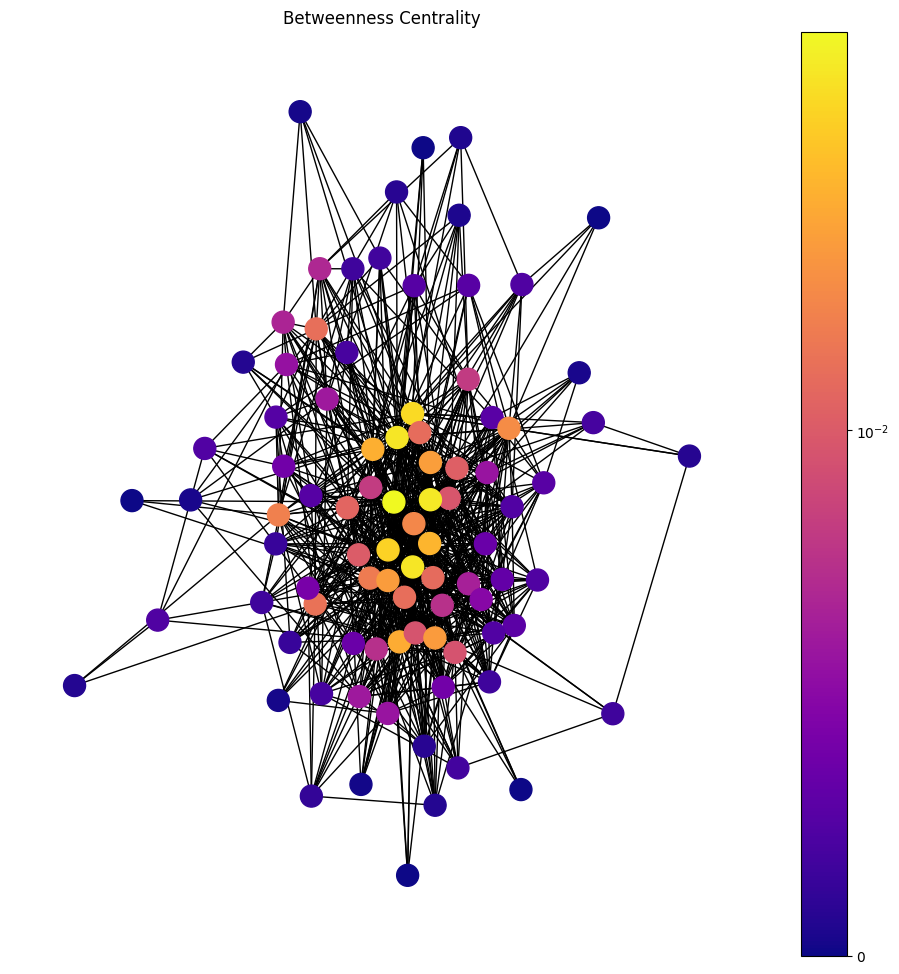

In [94]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

In [95]:
'''
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti
'''

"\nplt.figure(figsize=(12,12))\npos = nx.spiral_layout(graph)\ndraw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti\n"

{886: '#3173a1', 907: '#e0802c', 1550: '#3a913a', 1585: '#c03c3d', 1800: '#9371b2', 2425: '#835b53', 2777: '#d584bc', 3184: '#7f7f7f', 3743: '#a8a935', 4285: '#2dabb8'}


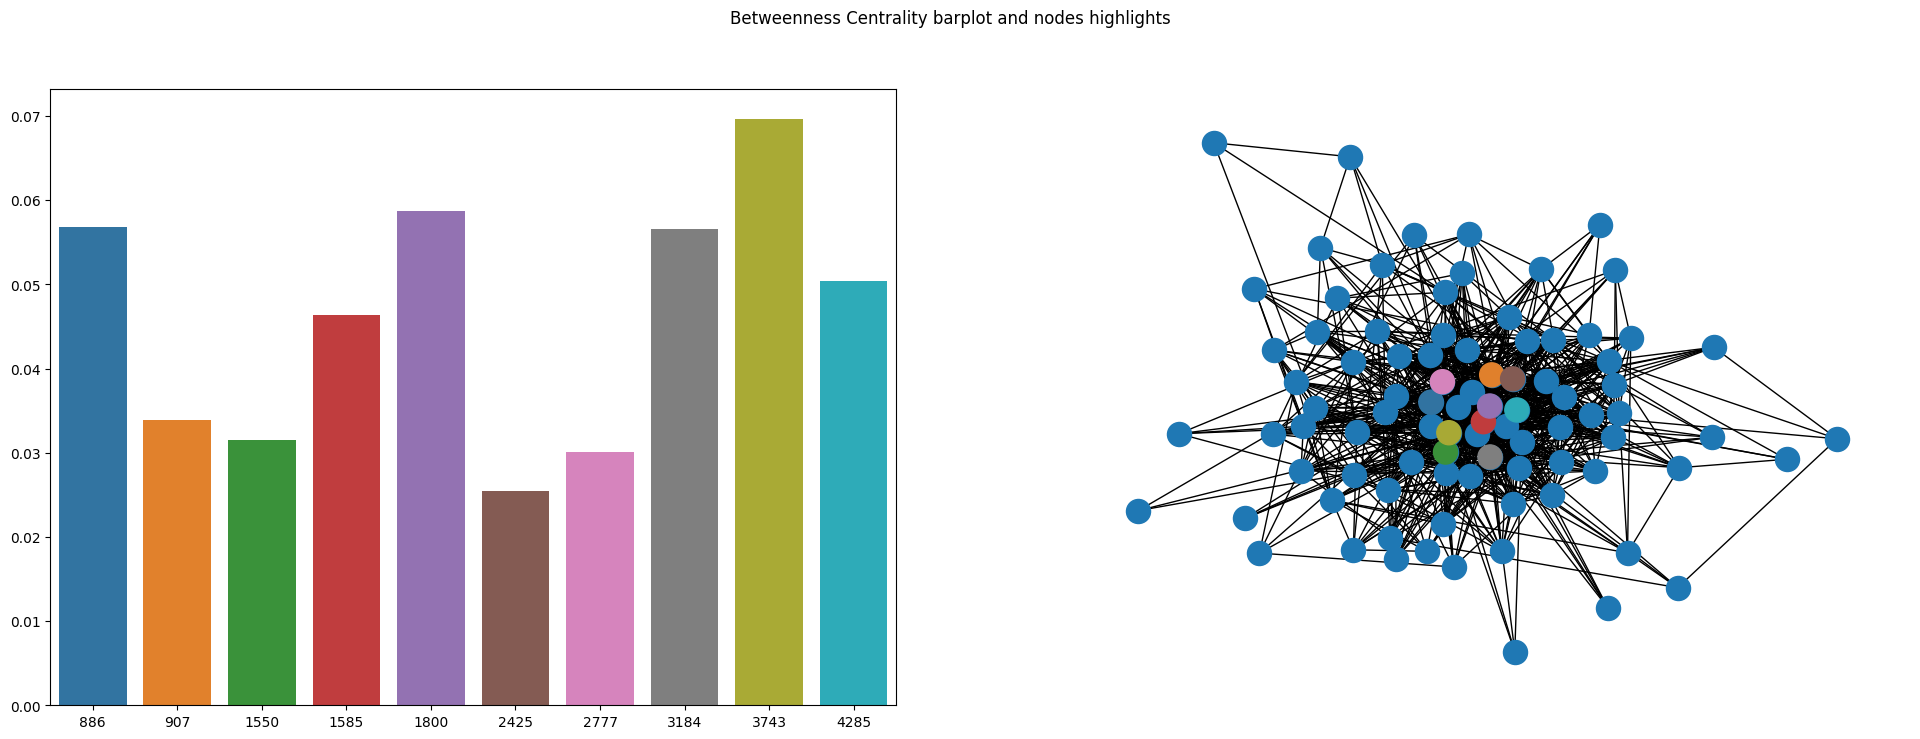

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [96]:
dizionario_colori = barplot_nodes(graph,bet, "Betweenness")

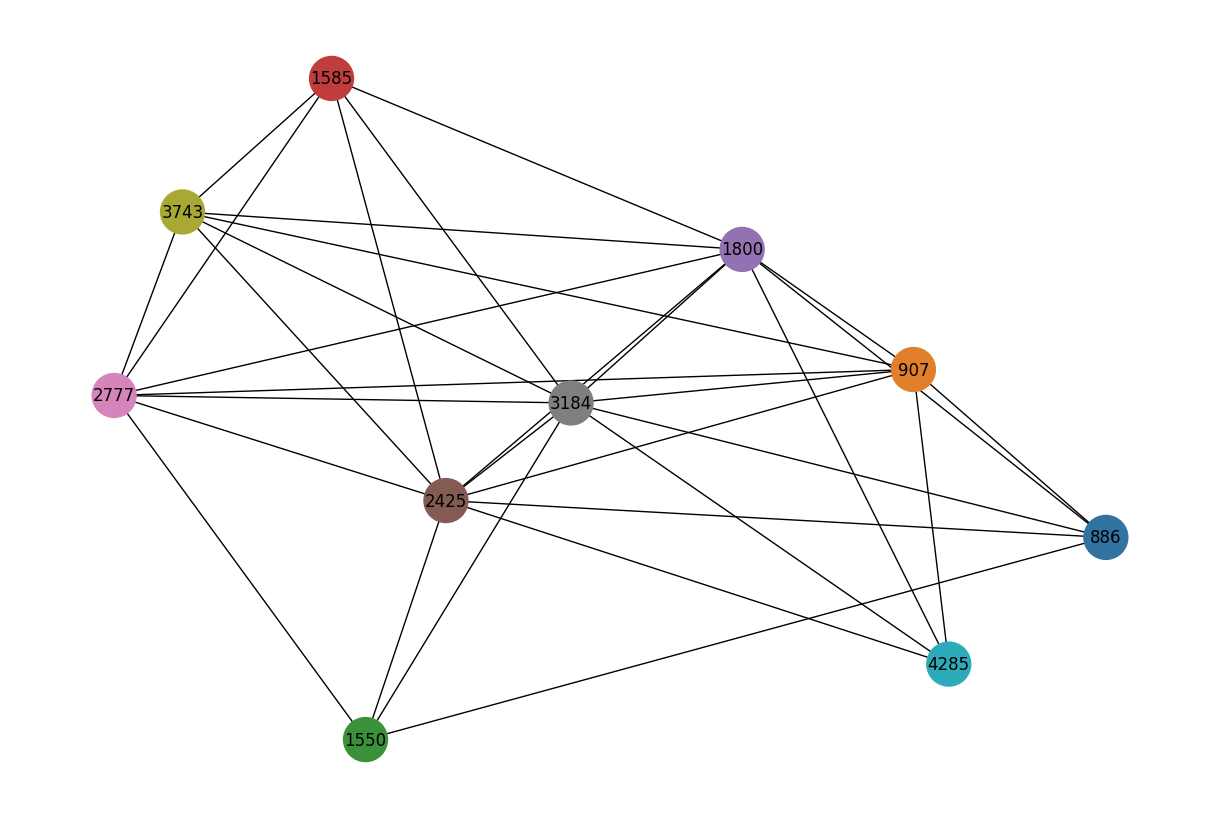

In [97]:
important_node_centrality_plot(bet, df_edge, dizionario_colori)

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

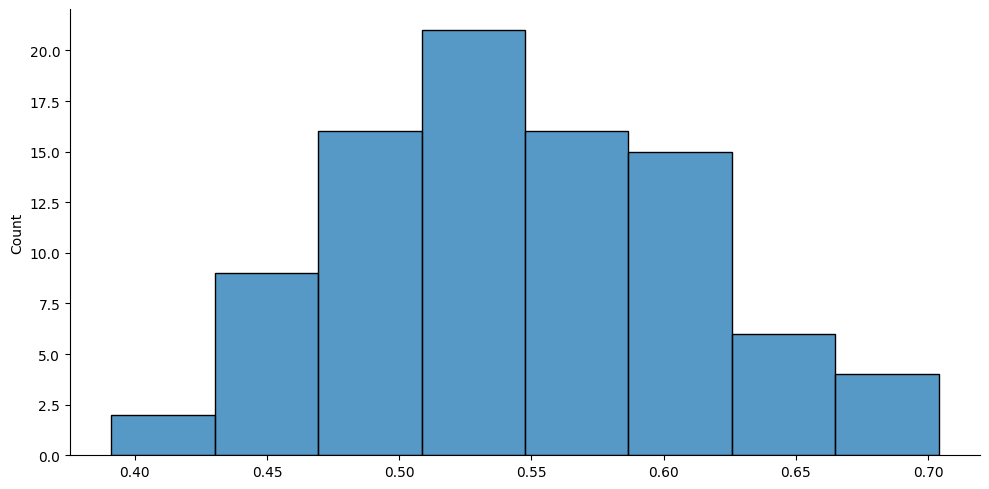

In [98]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

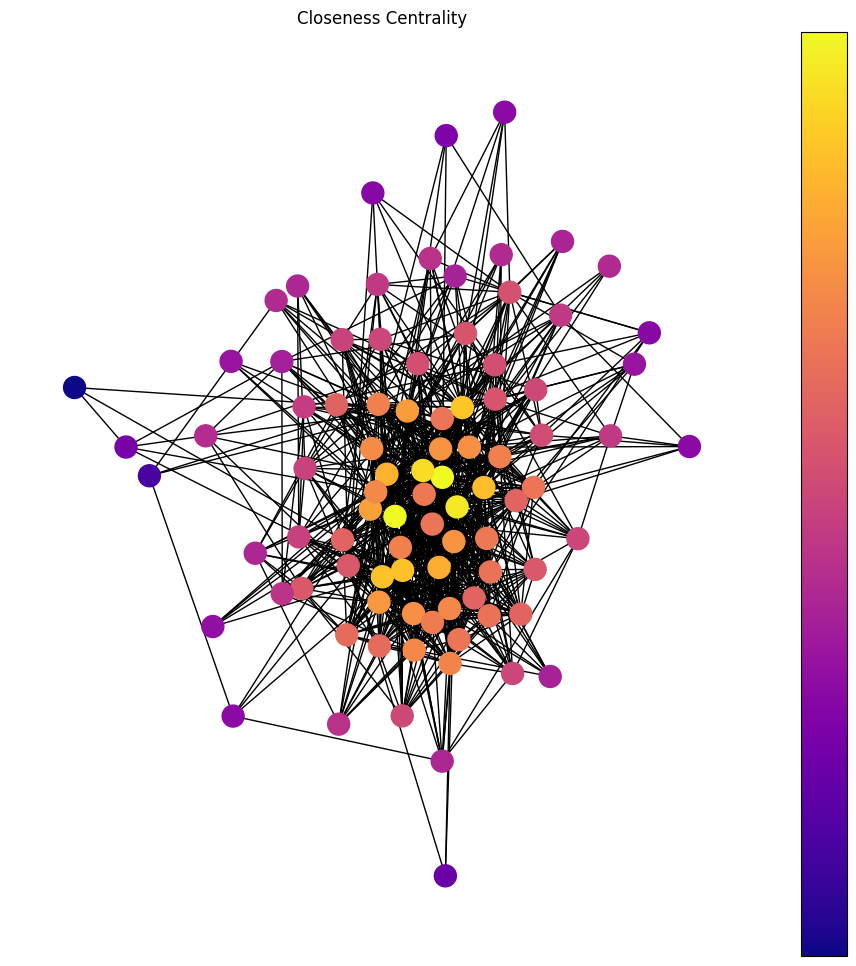

In [99]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

In [100]:
'''
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti
'''

"\nplt.figure(figsize=(12,12))\npos = nx.spiral_layout(graph)\ndraw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti\n"

{886: '#3173a1', 907: '#e0802c', 1585: '#3a913a', 1800: '#c03c3d', 2425: '#9371b2', 2535: '#835b53', 2777: '#d584bc', 3184: '#7f7f7f', 3579: '#a8a935', 3743: '#2dabb8'}


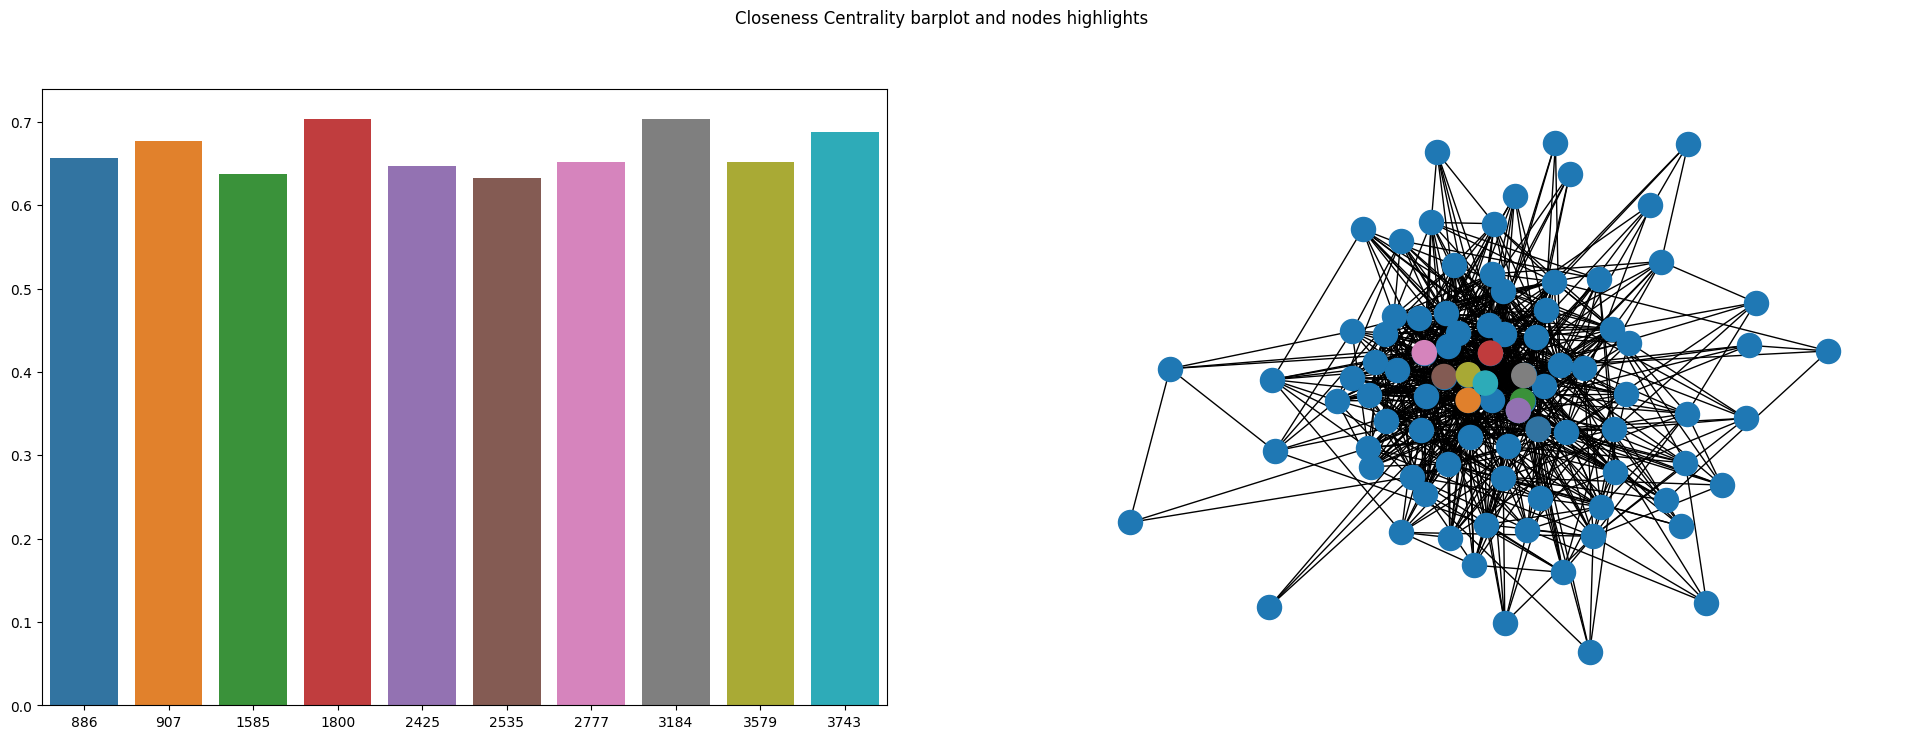

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [101]:
dizionario_colori = barplot_nodes(graph,clos, "Closeness")

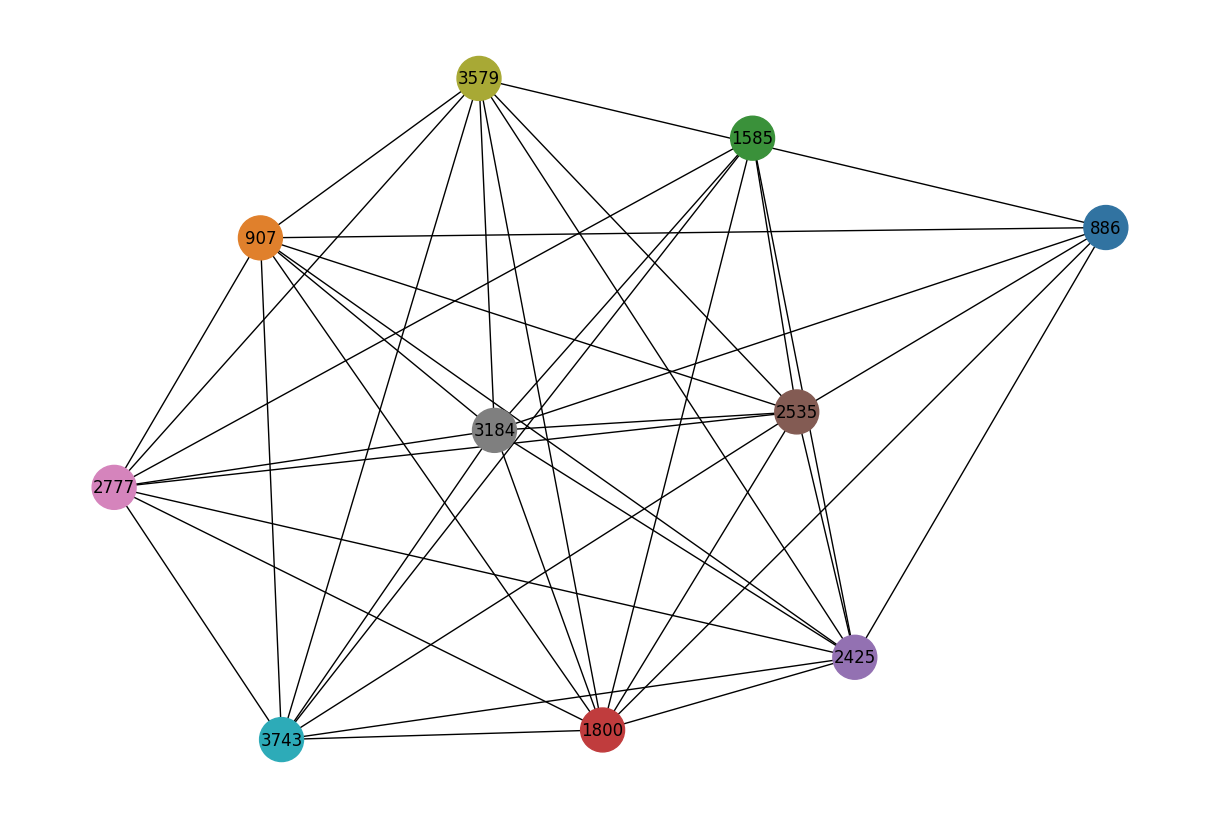

In [102]:
important_node_centrality_plot(clos, df_edge, dizionario_colori)

Eigenvector Centrality

C:\Users\sam\AppData\Local\Temp\ipykernel_19696\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot: ylabel='Density'>

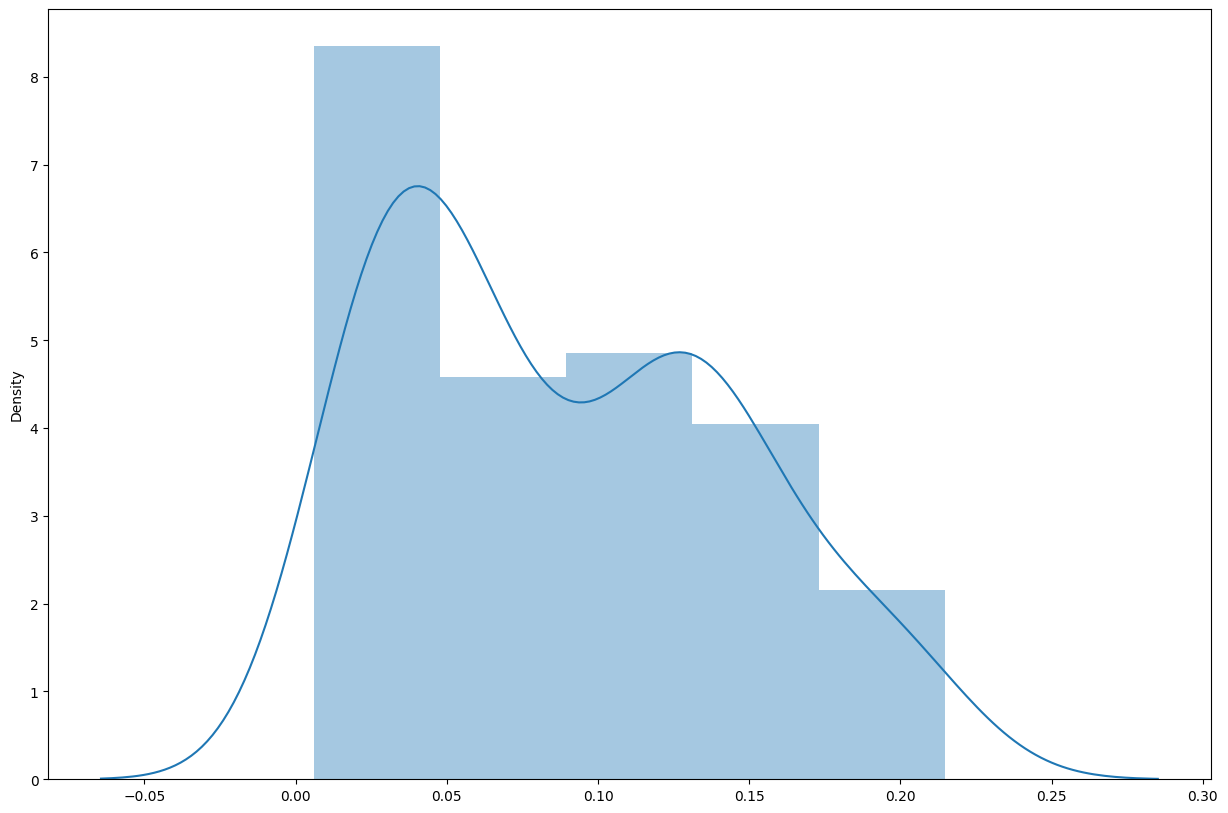

In [103]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

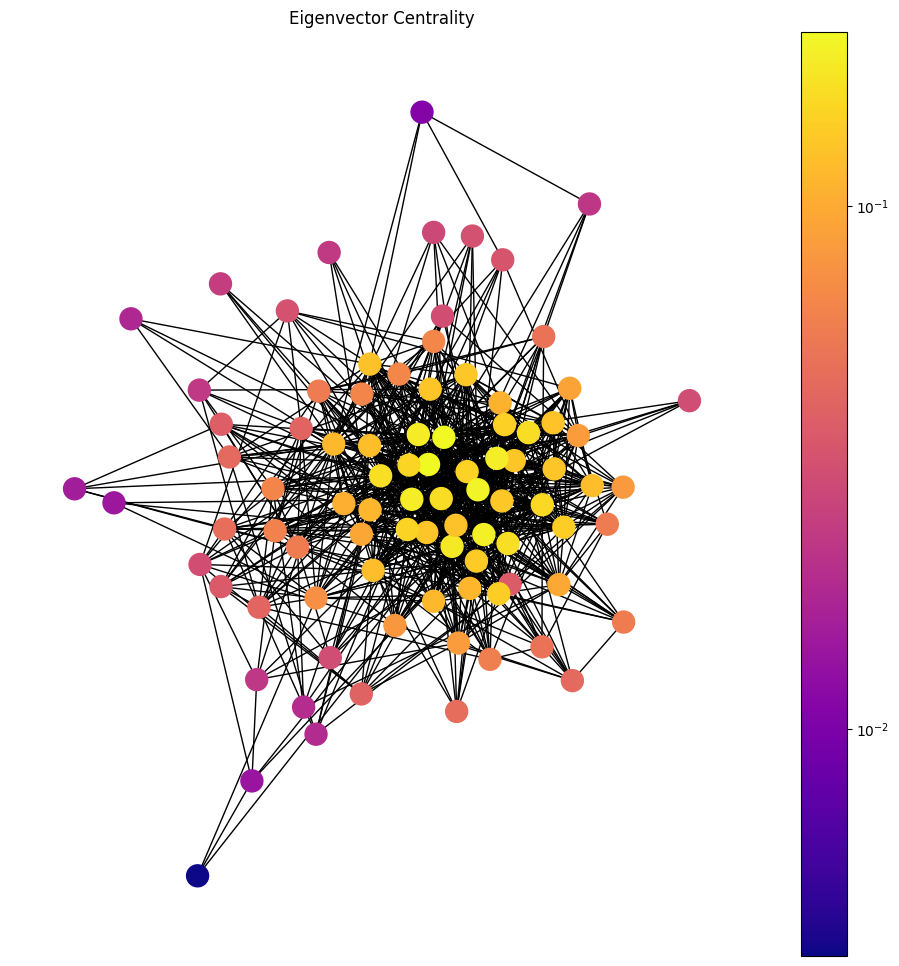

In [104]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

In [105]:
'''
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti
'''

"\nplt.figure(figsize=(12,12))\npos = nx.spiral_layout(graph)\ndraw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti\n"

{886: '#3173a1', 907: '#e0802c', 1779: '#3a913a', 1800: '#c03c3d', 2425: '#9371b2', 2535: '#835b53', 2777: '#d584bc', 3184: '#7f7f7f', 3579: '#a8a935', 3743: '#2dabb8'}


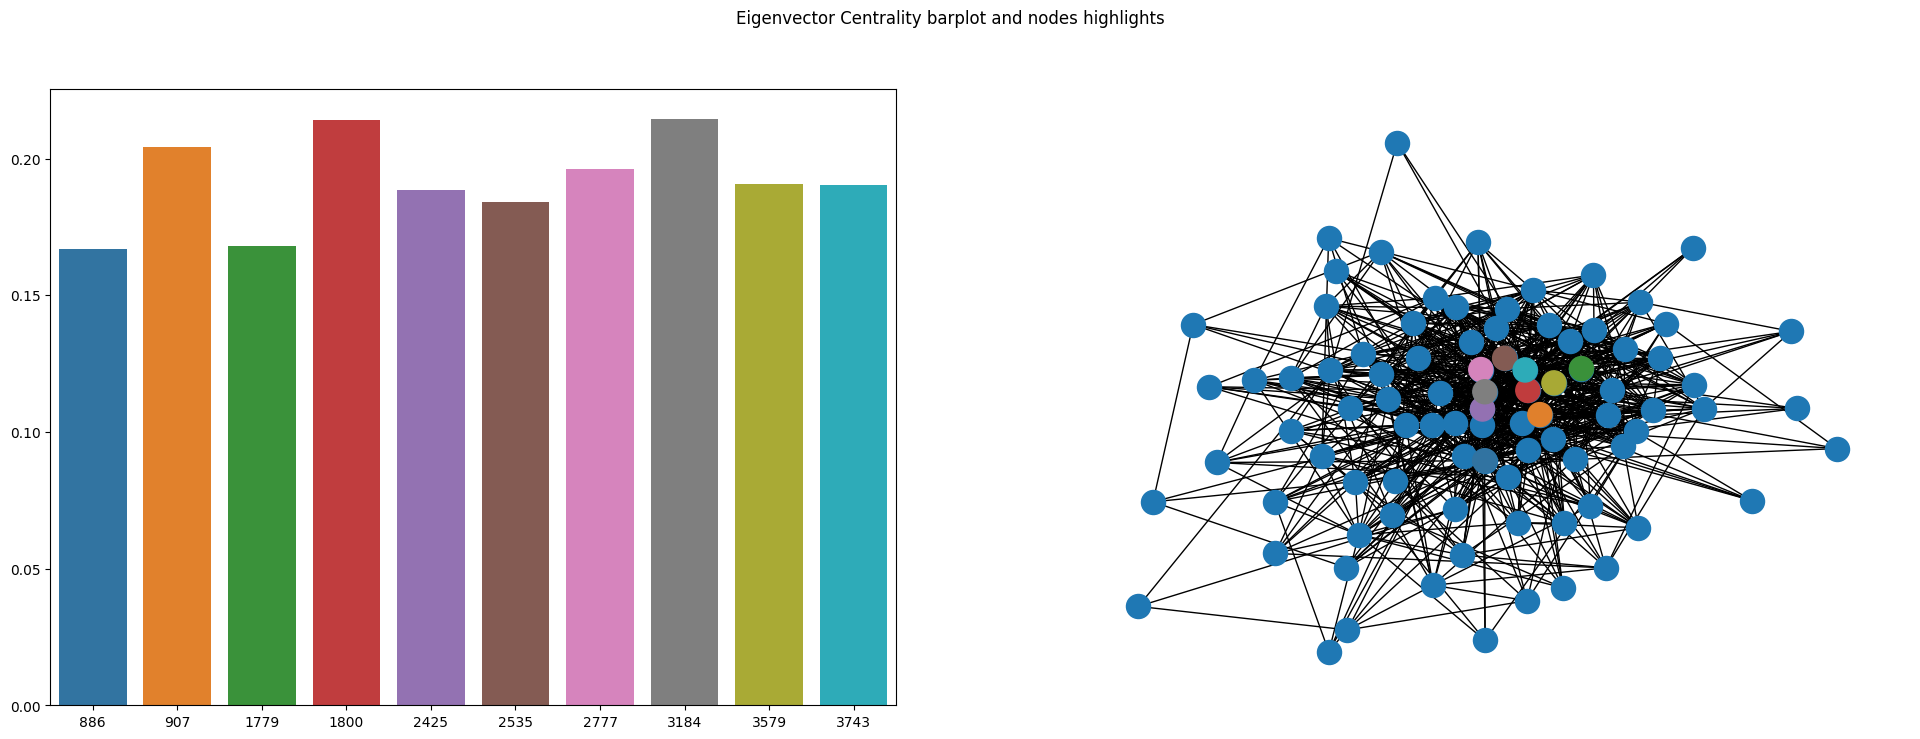

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [106]:
dizionario_colori = barplot_nodes(graph,eigv, "Eigenvector")

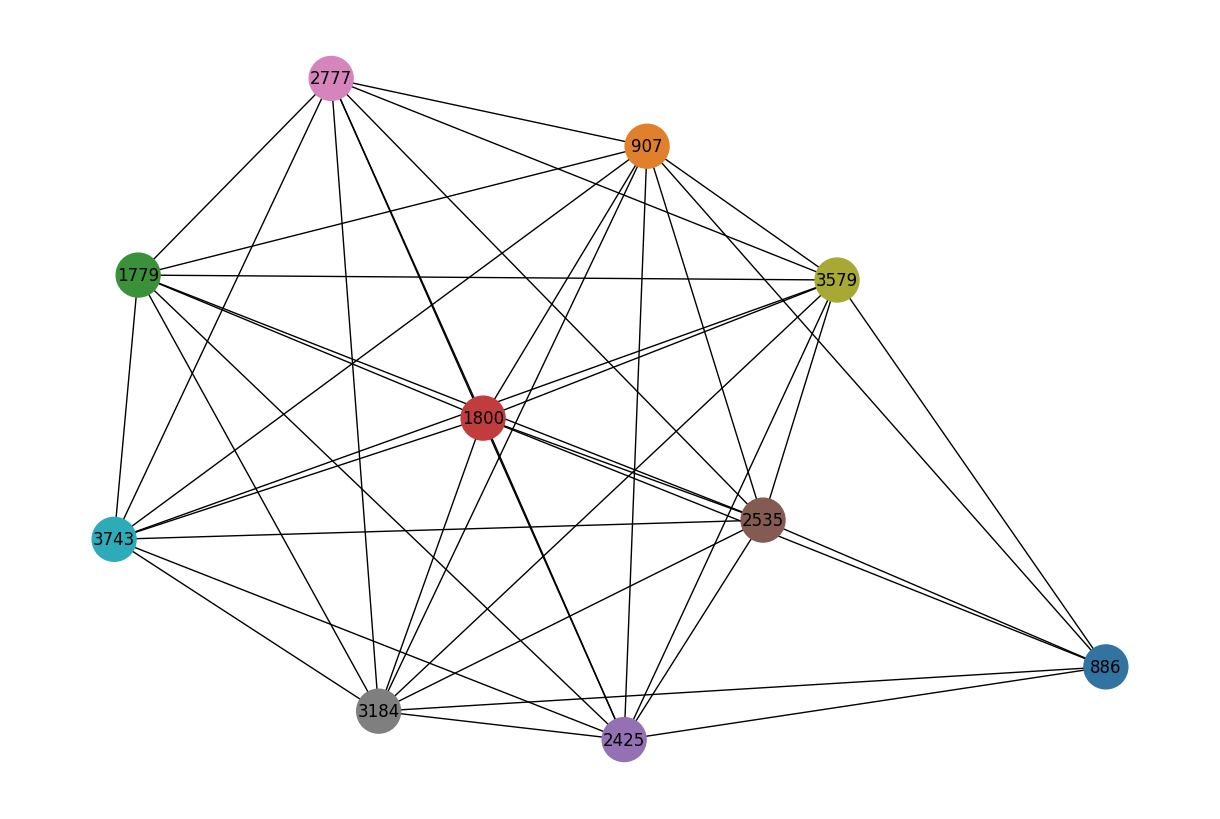

In [107]:
important_node_centrality_plot(eigv, df_edge, dizionario_colori)

PageRank

<Figure size 1500x1000 with 0 Axes>

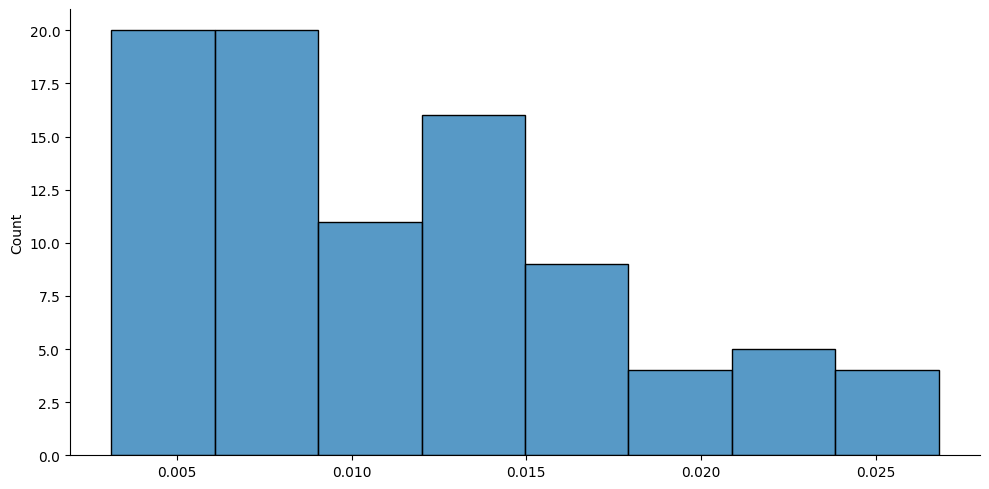

In [108]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

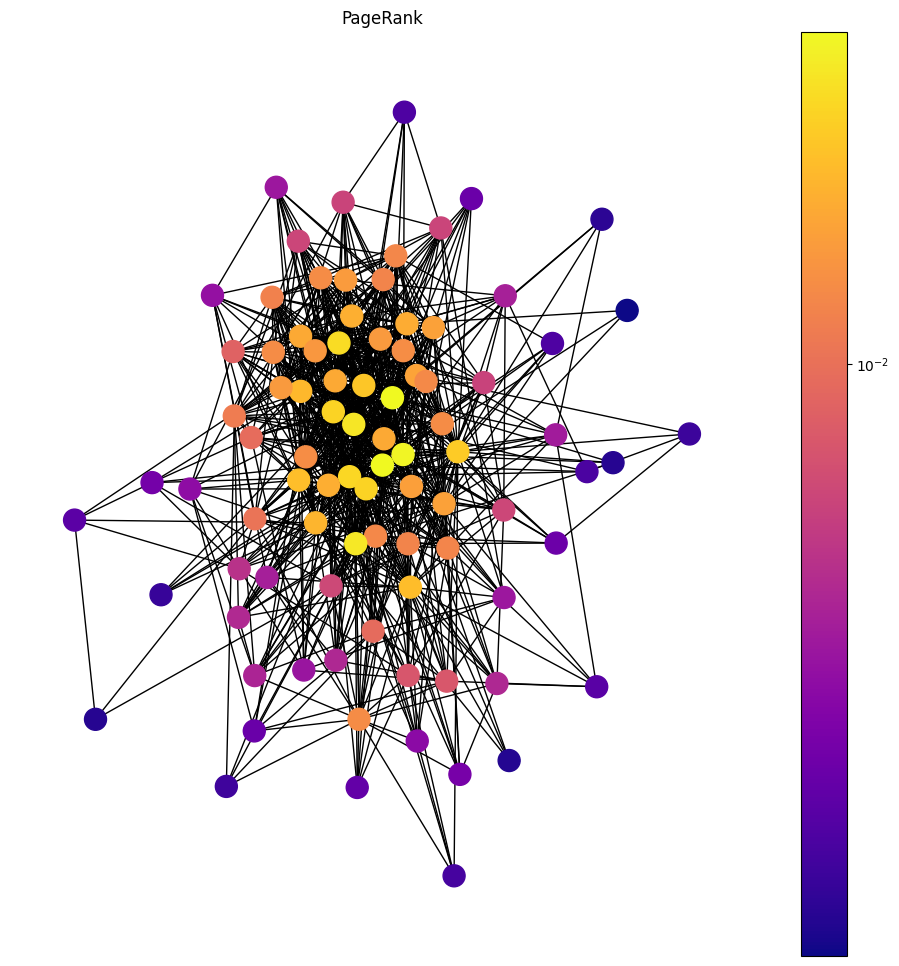

In [109]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

In [110]:
'''
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti
'''

"\nplt.figure(figsize=(12,12))\npos = nx.spiral_layout(graph)\ndraw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti\n"

{886: '#3173a1', 907: '#e0802c', 1585: '#3a913a', 1800: '#c03c3d', 2425: '#9371b2', 2777: '#835b53', 3184: '#d584bc', 3579: '#7f7f7f', 3743: '#a8a935', 4285: '#2dabb8'}


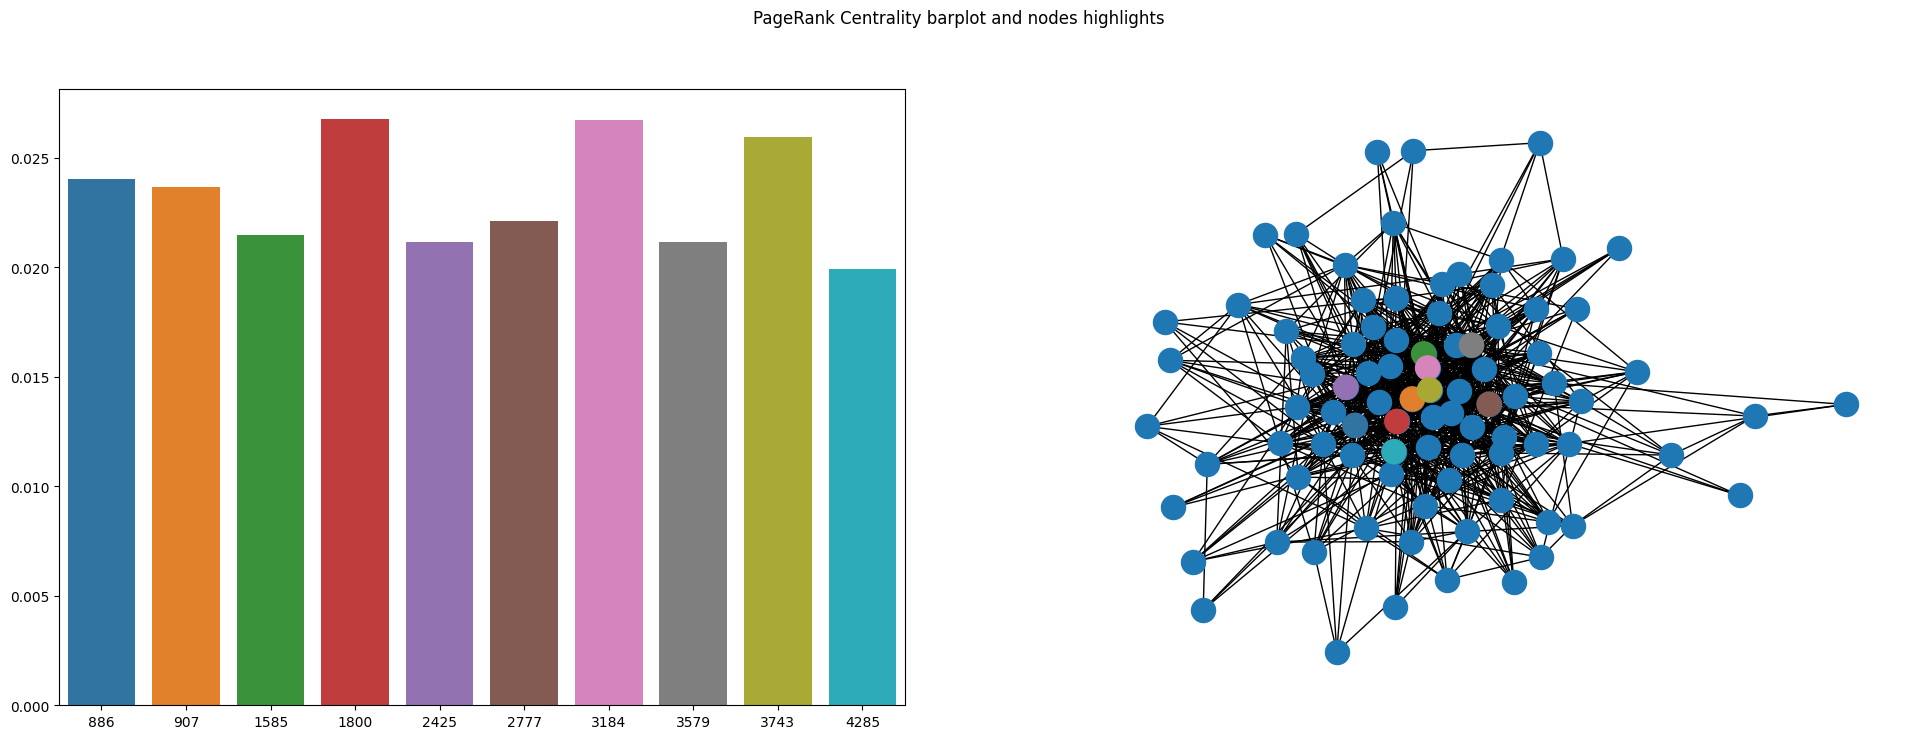

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [111]:
dizionario_colori = barplot_nodes(graph, pager, "PageRank")

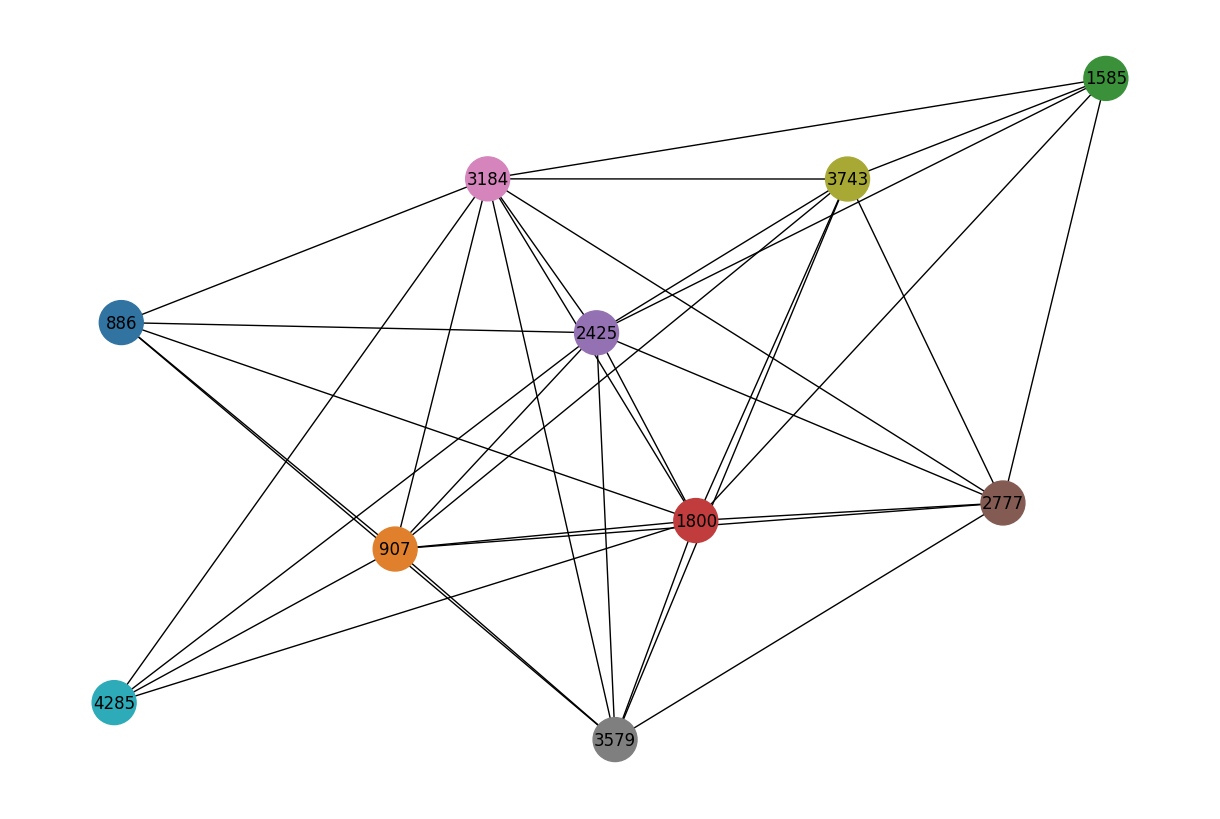

In [112]:
important_node_centrality_plot(pager, df_edge, dizionario_colori)

### Analisi delle strutture

Communites

In [9]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)

In [10]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.Graph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph,dizionario,k):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
    fig.suptitle('Community '+str(k+1))
    colors = sns.color_palette('pastel')[0:5]
    ax1.pie([dizionario["partner"],dizionario["not_partner"]], labels = ["Partner","Not Partner"], colors = ["#6441a5","#808080"], autopct='%.0f%%')
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos,ax=ax2,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario["colors"].keys()), node_color=list(dizionario["colors"].values()))\
       .set_edgecolor('k') 

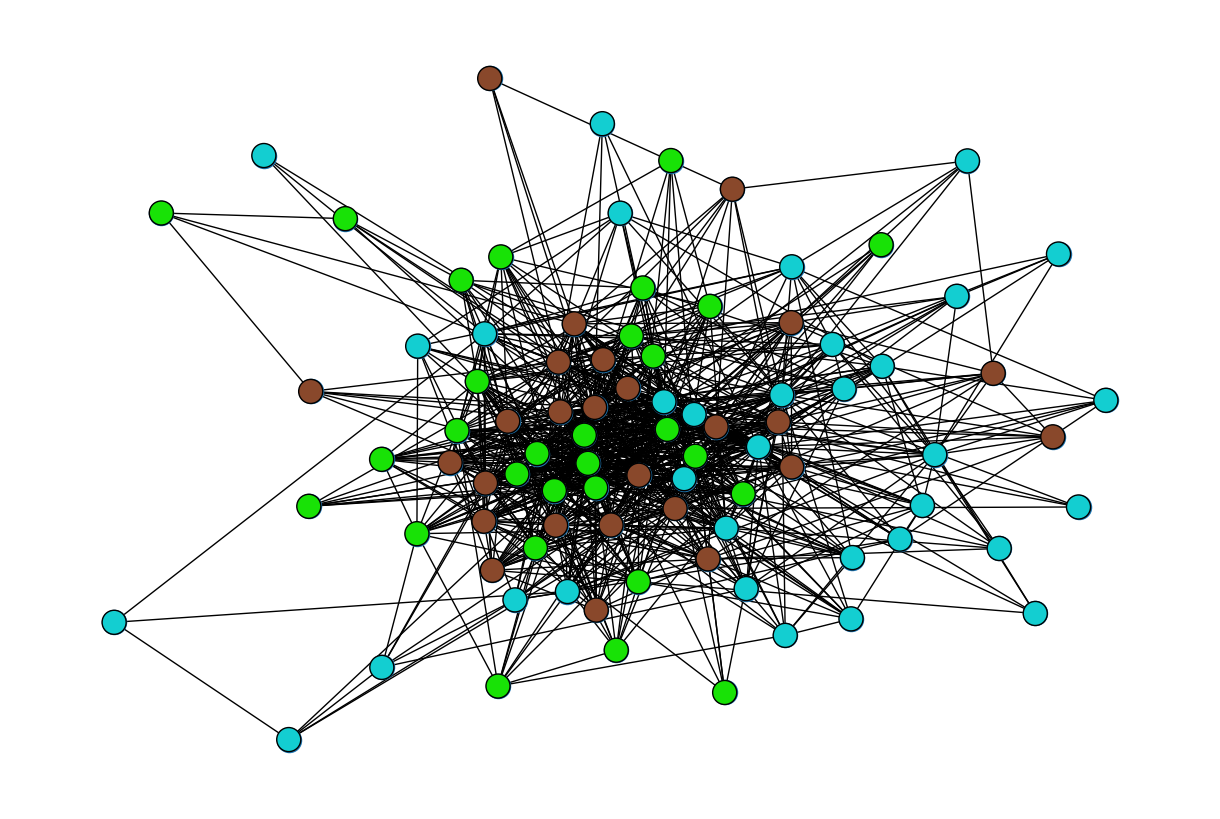

In [11]:

import random

def visualizza_community(graph,dizionario):
    pos = nx.fruchterman_reingold_layout(graph)
    plt.figure(figsize=(12,8))    
    nx.draw(graph, pos,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario.keys()), node_color=list(dizionario.values()))\
       .set_edgecolor('k') 
    plt.show()

colors_communities = []
dic_colors={}
r = lambda: random.randint(0,255)
for c in communities:
    color = '#%02X%02X%02X' % (r(),r(),r())
    for el in c:
        dic_colors[el]=color

visualizza_community(grafo(graph.nodes, graph.edges),dic_colors)


In [115]:
dictionary = {}
k=0
partner_color="#6441a5"
not_partner_color="#808080"
for c in communities:
    partner = 0
    not_partner = 0
    supp_dic={}
    supp_dic_2 = {}
    supp_list=[]
    views = []
    total_views=0
    for el in c:
        node = df_target[df_target["new_id"]==el]
        total_views += int(node["views"])
        views.append(int(node["views"]))
        if node["partner"].bool(): 
            supp_dic[el]=partner_color
            partner+=1
        else:
            supp_dic[el]=not_partner_color
            not_partner+=1
    supp_dic_2["colors"] = supp_dic
    supp_dic_2["partner"] = partner
    supp_dic_2["not_partner"] = not_partner
    supp_dic_2["mean_views"] = round(total_views/len(c),2)
    supp_dic_2["dev_standard_views"] = np.std(views)
    print(supp_dic_2["dev_standard_views"])
    dictionary[k] = supp_dic_2
    k+=1



12822676.575306367
16082886.016644387
29438993.296110857


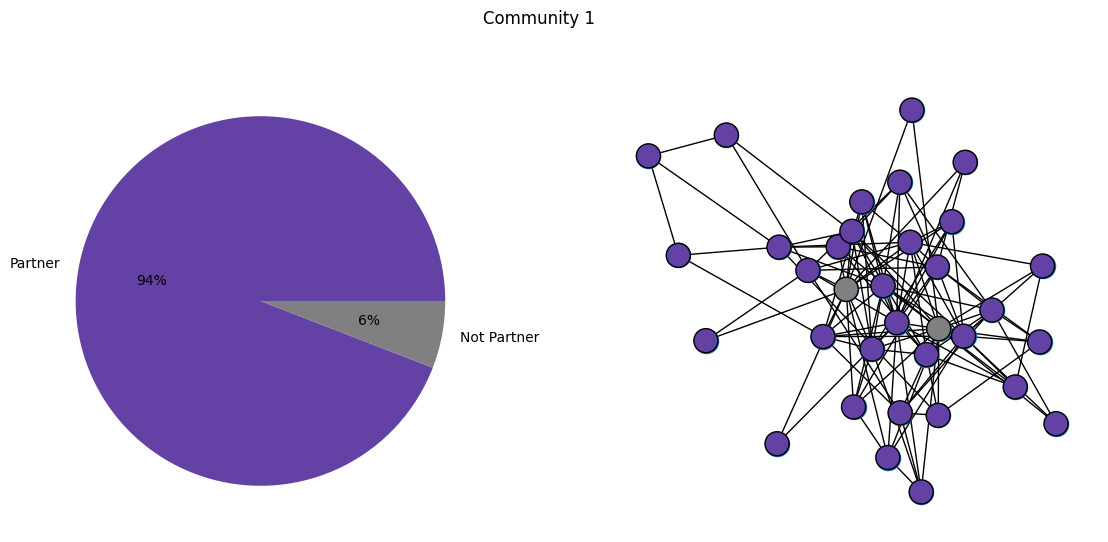

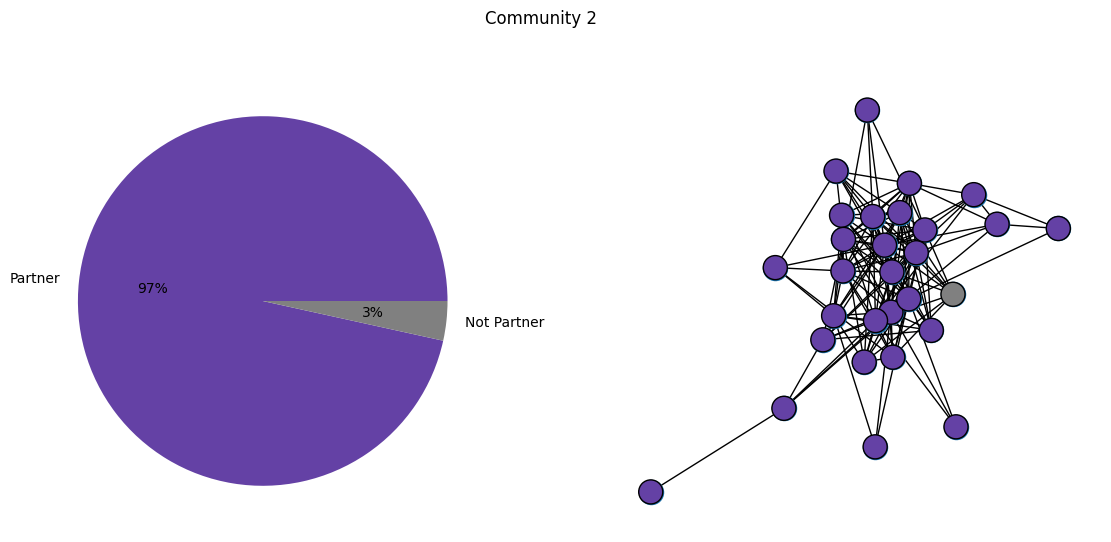

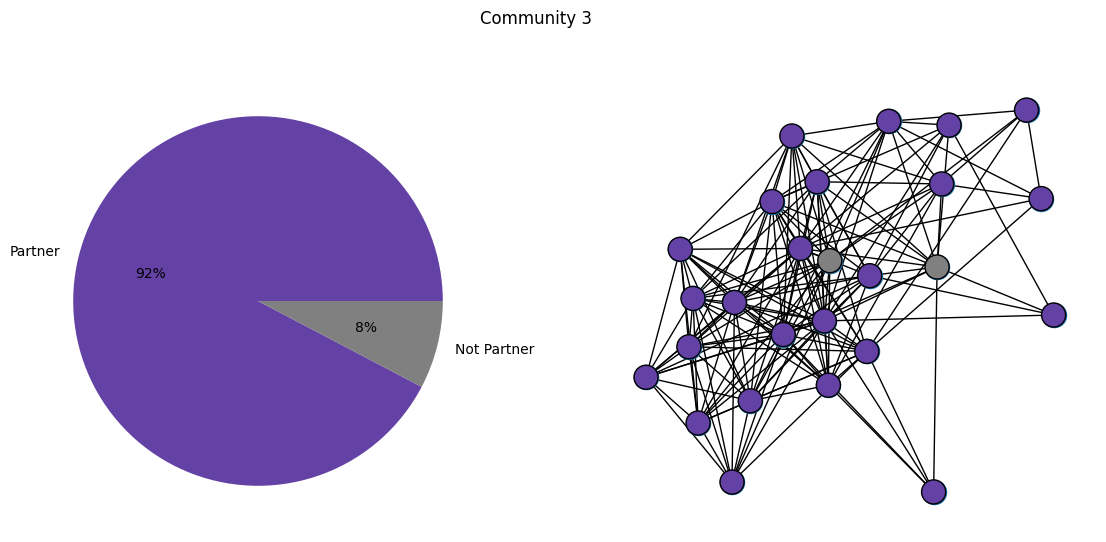

In [116]:
k=0
mean_views = []
dev_standard_views = []
list_communites = []
for c in communities:
    if len(c) == 1:
        continue
    edges = caricamento(c)
    visualizza(grafo(c, edges),dictionary[k],k)
    mean_views.append(dictionary[k]["mean_views"])
    dev_standard_views.append(dictionary[k]["dev_standard_views"])
    list_communites.append("Community "+str(k+1))
    k+=1

In [117]:
len(communities)

3

[12822676.575306367, 16082886.016644387, 29438993.296110857]


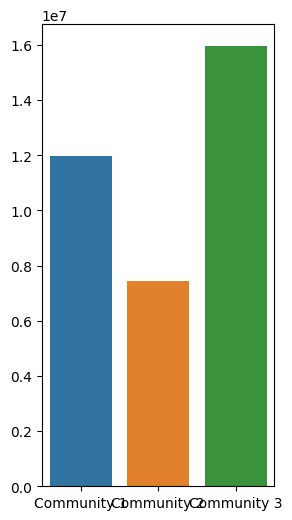

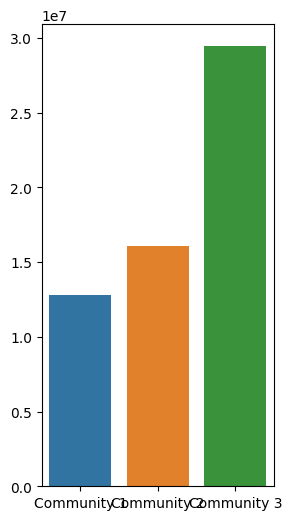

In [118]:
plt.figure(figsize=(len(communities), 6))
sns.barplot(x=list_communites,y= mean_views)
plt.figure(figsize=(len(communities), 6))
sns.barplot(x=list_communites,y= dev_standard_views)
print(dev_standard_views)

Triadi

In [119]:
def trova_triadi(grafo):
  triadi = {}
  for nodes in combinations(grafo.nodes, 3):
    n_edges = grafo.subgraph(nodes).number_of_edges()
    triadi.setdefault(n_edges, []).append(nodes)
  return(triadi)

In [120]:
# triadi = trova_triadi(graph)
# print('Triadi del grafo totale: ' + str(len(triadi[1])))

In [121]:
count = 1
print('Triadi per community')
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    triadi = trova_triadi(community_graph)
    if not 1 in triadi:
        continue
    print("Community " + str(count) + " : " + str(len(triadi[1])))
    count = count + 1

Triadi per community
Community 1 : 2089
Community 2 : 1407
Community 3 : 1042


Clique

In [122]:
#Codice per trovare le Clique
max = 0
max_clique = []
cliques = nx.find_cliques(graph.to_undirected())
for clique in cliques:
    if max < len(clique):
        max = len(clique)
        max_clique = clique
print(max)
print(max_clique)

13
[1800, 907, 3410, 2580, 1829, 459, 1779, 2964, 3579, 4121, 2777, 108, 2535]


K-core

In [123]:
#Codice per trovare K-core
# Calcolo del k-core del grafo (nel caso specifico, k = 3)
k = 3
k_core = nx.k_core(graph, k)
print('k-core con k=3')
print(list(k_core.nodes()))

k_core = nx.k_core(graph)
print('\nk-core: Main core')
print(list(k_core.nodes()))

k-core con k=3
[3, 6, 1550, 528, 2580, 4121, 3104, 3119, 3633, 1585, 2614, 568, 57, 2634, 598, 97, 108, 3183, 3184, 636, 3205, 646, 2698, 1180, 3743, 3237, 3243, 4277, 693, 1725, 1214, 4285, 2243, 203, 715, 208, 1749, 2777, 4313, 3294, 2273, 2276, 3305, 240, 1779, 1276, 1798, 1800, 2824, 3855, 3347, 3348, 1300, 1302, 1309, 1829, 297, 3369, 1326, 319, 2371, 3410, 342, 3948, 886, 2425, 1916, 895, 3972, 3973, 907, 3981, 912, 2963, 2964, 2457, 429, 1456, 459, 2510, 3534, 1492, 471, 1495, 3545, 3040, 2535, 2542, 3579]

k-core: Main core
[646, 1800, 2698, 907, 2580, 2964, 4121, 3743, 1829, 429, 1456, 1585, 4277, 319, 459, 208, 3410, 1492, 471, 1495, 2777, 97, 2273, 2535, 3305, 108, 3948, 2542, 3184, 1779, 886, 2425, 3579, 1916]


Ego Network

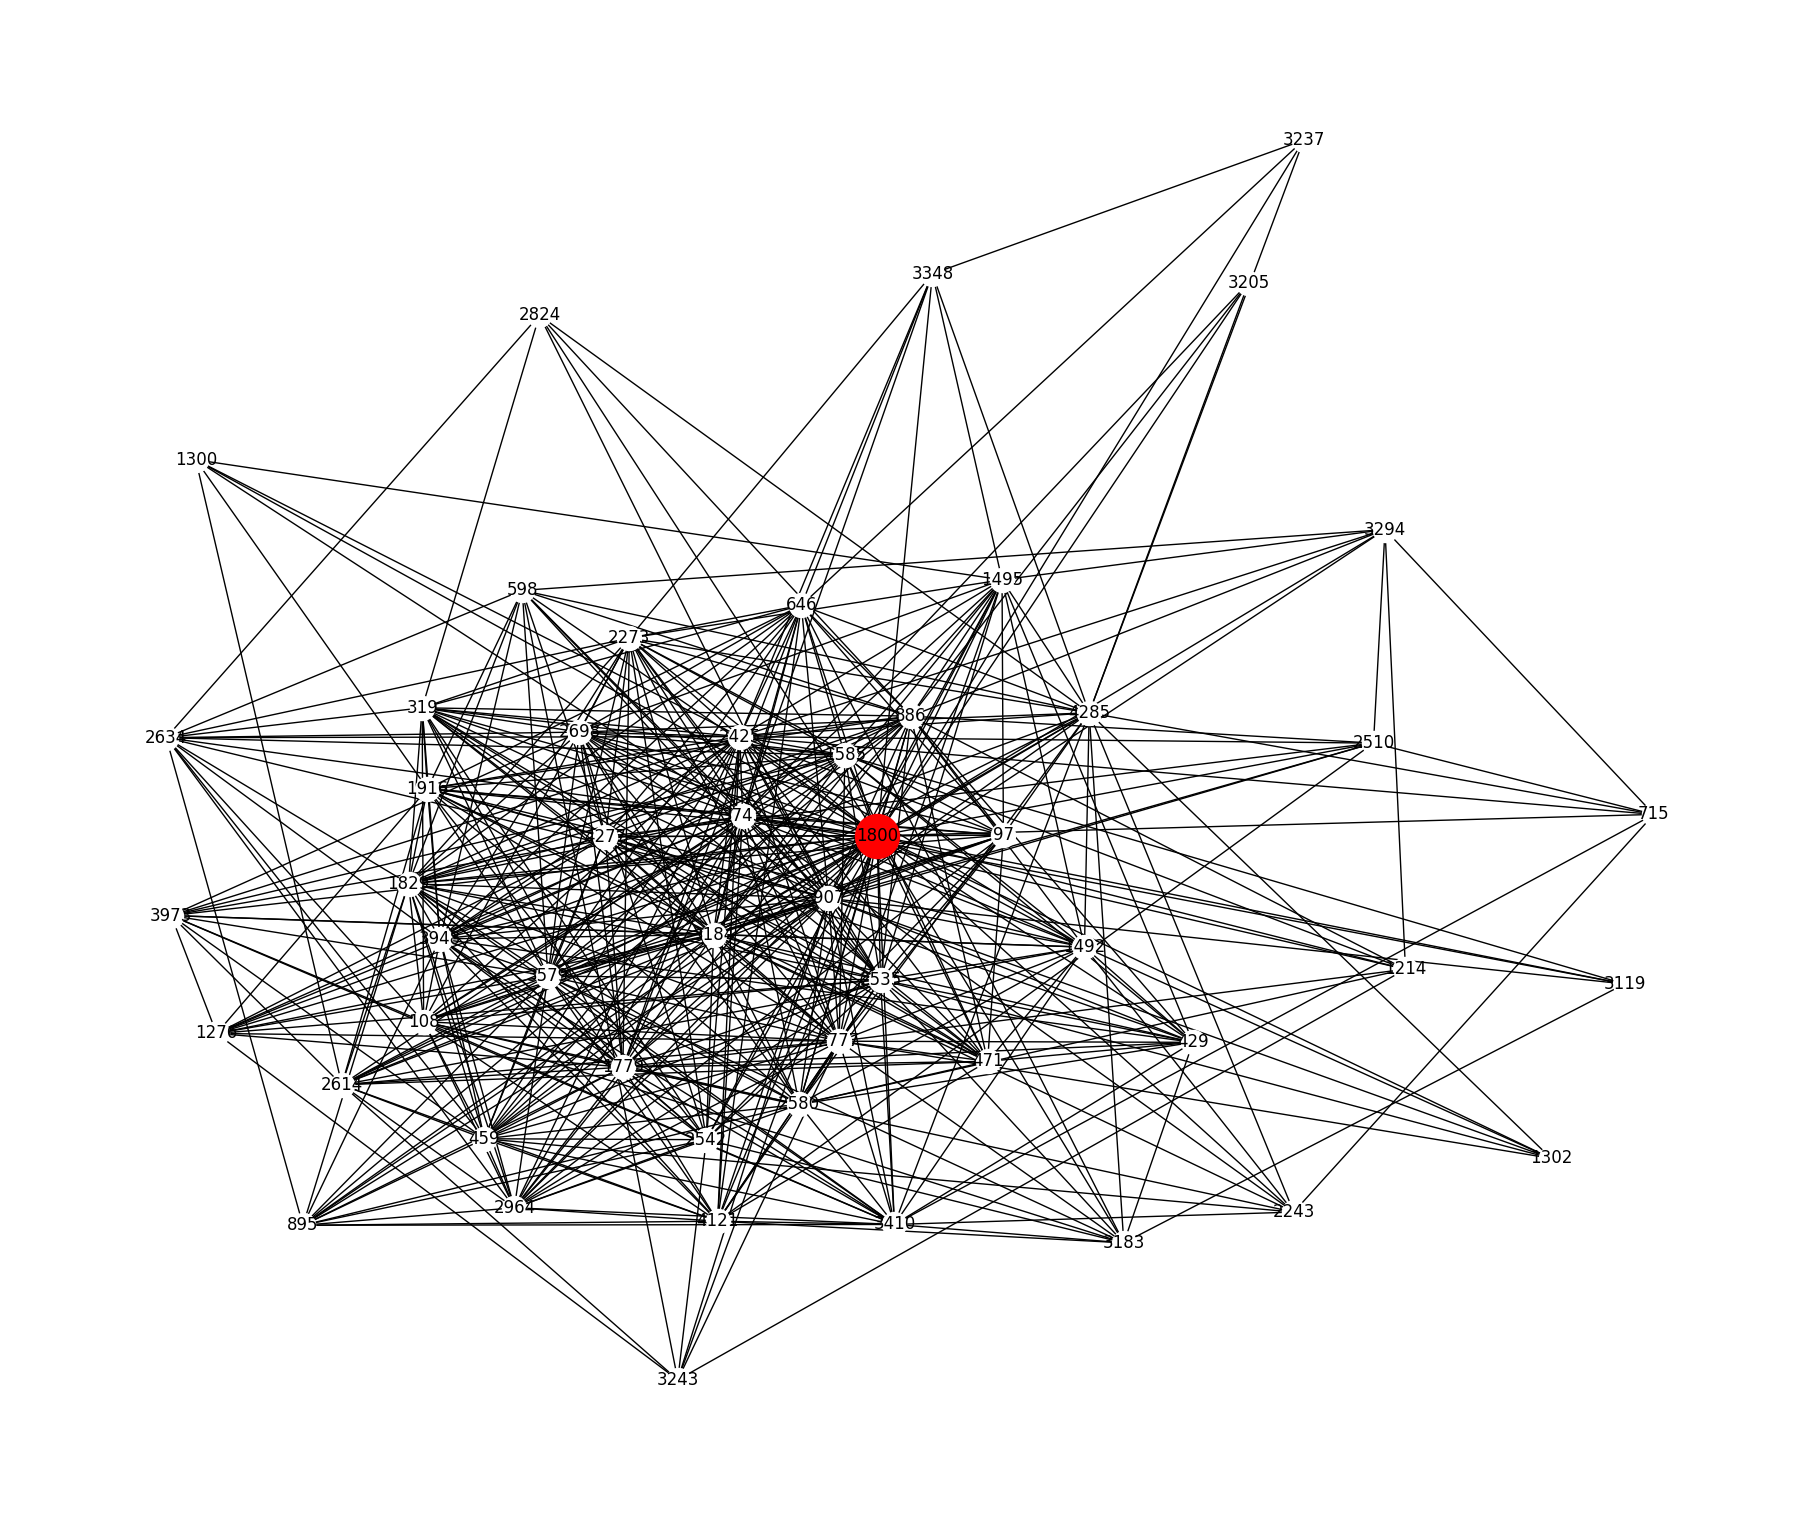

In [124]:
#Ego network della rete completa
plt.figure(figsize=(18, 15))
node_and_degree = graph.degree()
(largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Crea l'ego network dal componente principale (largest hub)
hub_ego = nx.ego_graph(graph, largest_hub)

# Plotta i nodi attorno al nodo ego
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

# Plotta il nodo ego (grande rosso)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
plt.show()

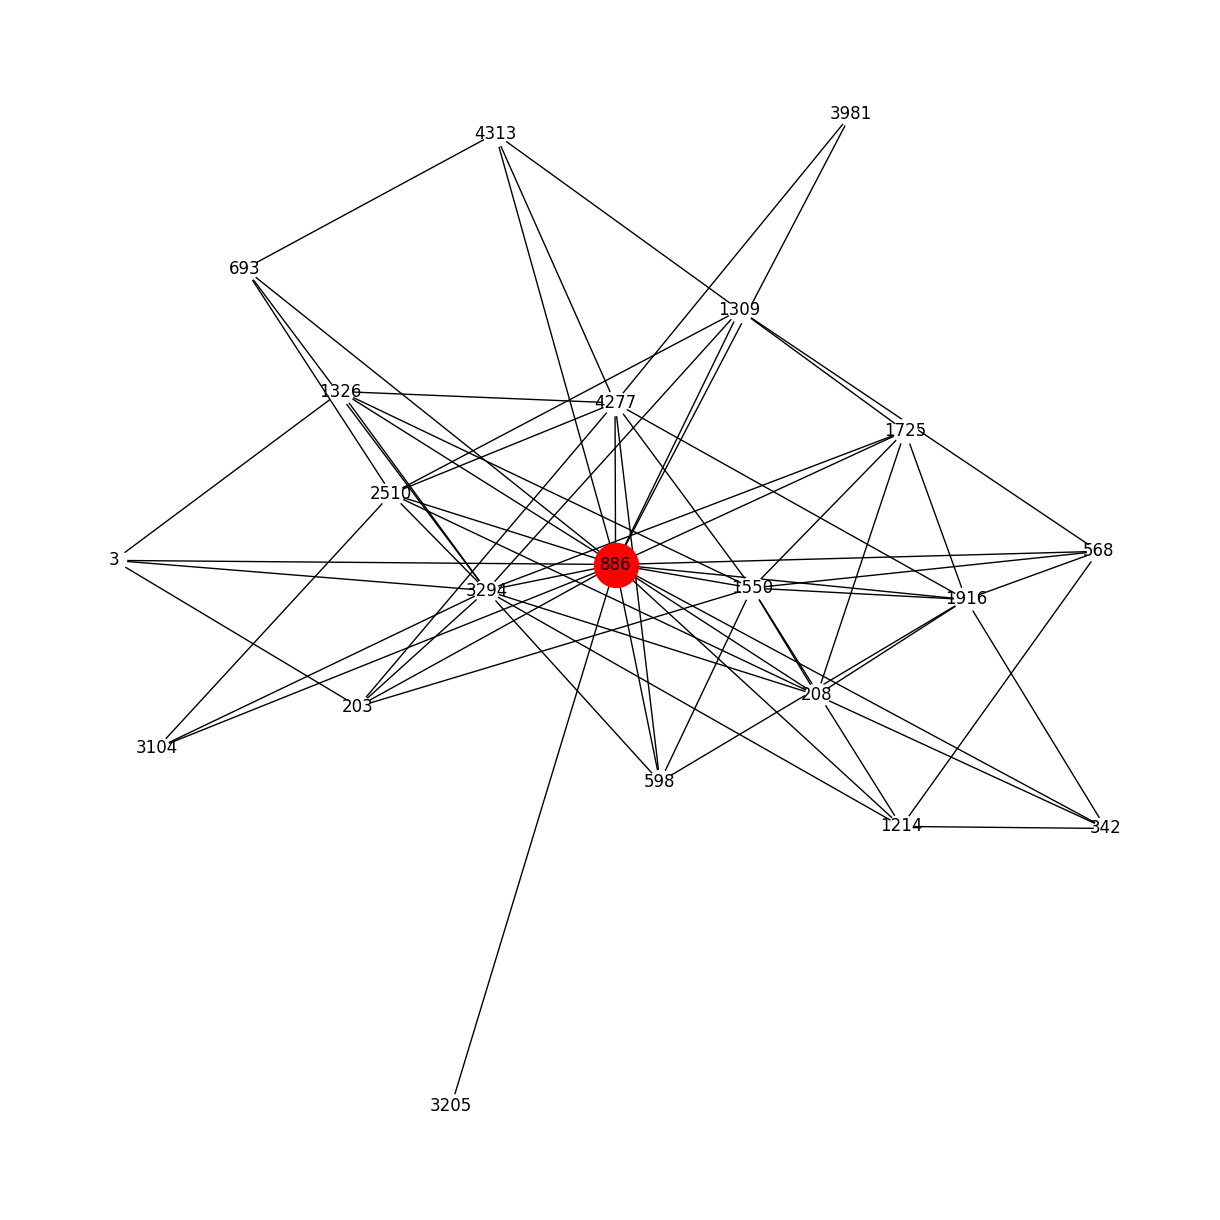

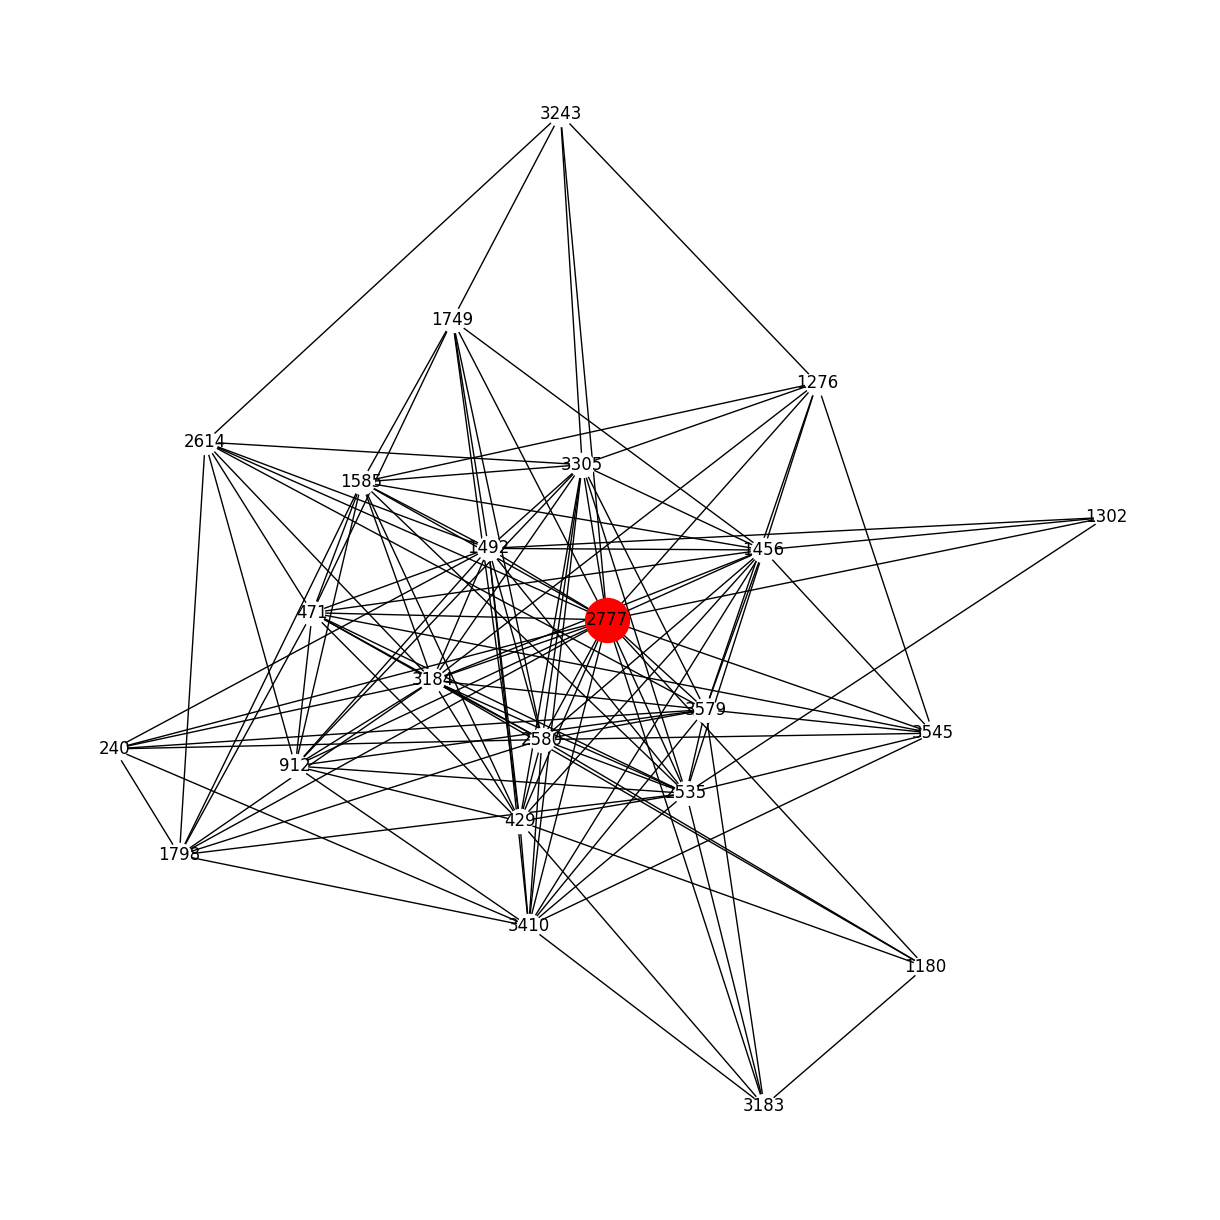

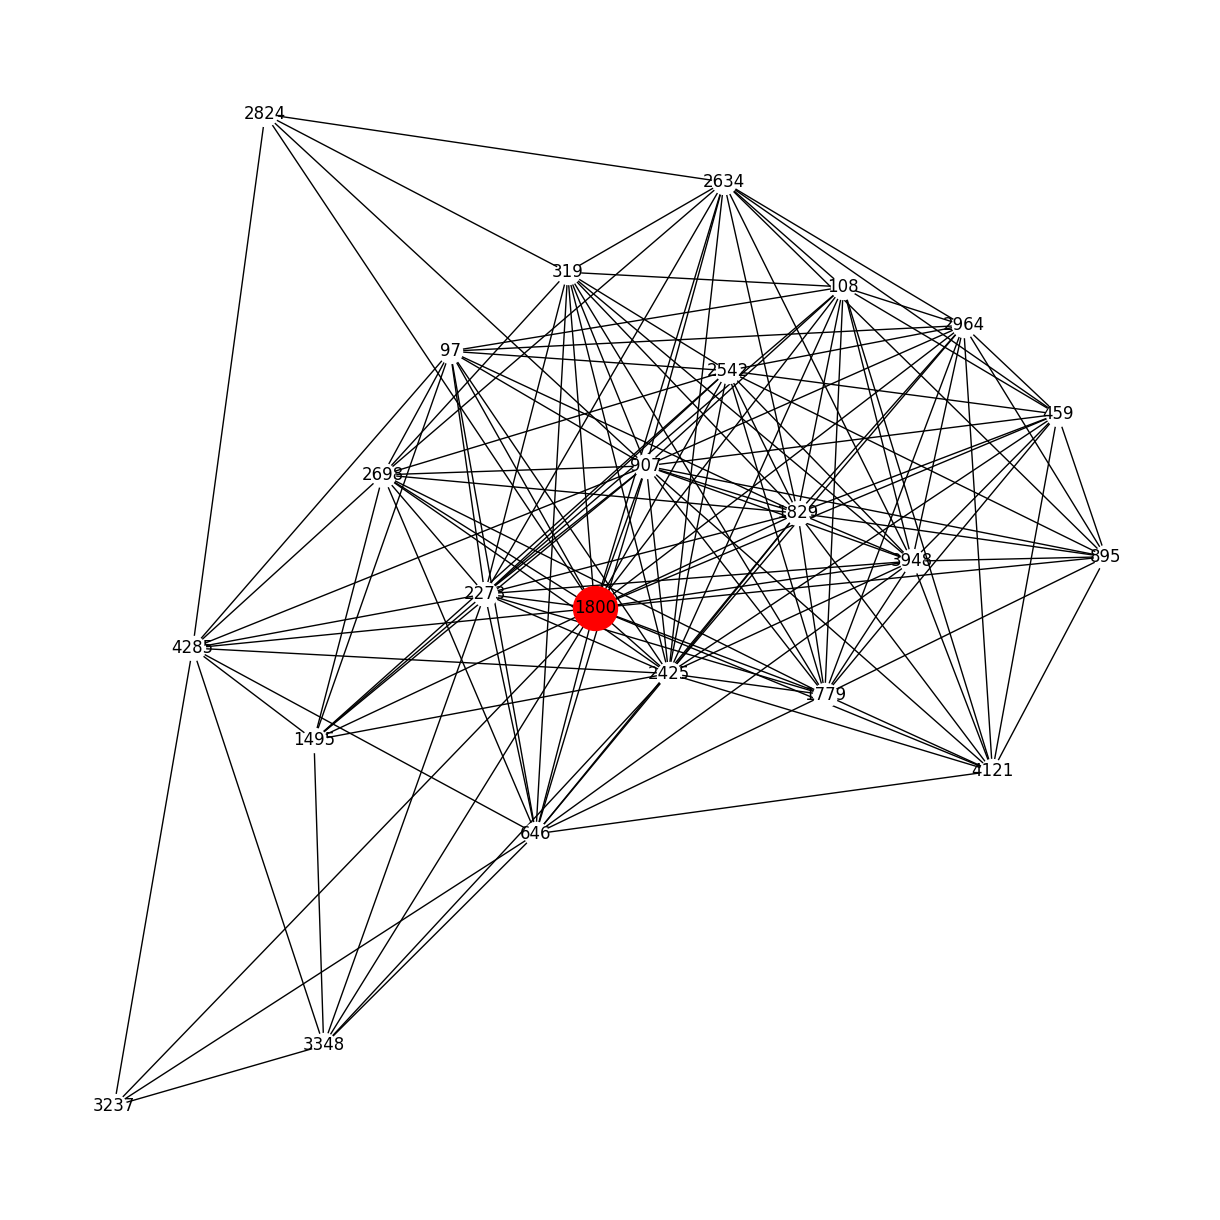

In [125]:
#Ego network delle singole community
count = 1
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    plt.figure(figsize=(12, 12))
    node_and_degree = community_graph.degree()
    (largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

    # Crea l'ego network dal componente principale (largest hub)
    hub_ego = nx.ego_graph(community_graph, largest_hub)

    # Plotta i nodi attorno al nodo ego
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

    # Plotta il nodo ego (grande rosso)
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
    plt.show()